In [8]:
import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score, accuracy_score, roc_curve, roc_auc_score

from time import time
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from scipy.stats import uniform

#wizualizaction
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_train = pd.read_csv("../input/Raw_train.csv")
raw_test =   pd.read_csv("../input/Raw_test.csv")


Adasyn_train = pd.read_csv('../input/Adasyn_train.csv')
Adasyn_test = pd.read_csv('../input/Adasyn_test.csv')

Nearmiss_train = pd.read_csv('../input//Nearmiss_train.csv')
Nearmiss_test = pd.read_csv('../input/Nearmiss_test.csv')

ROS_train = pd.read_csv('../input/ROS_train.csv')
ROS_test = pd.read_csv('../input/ROS_test.csv')

RUS_train = pd.read_csv('../input/RUS_train.csv')
RUS_test = pd.read_csv('../input/RUS_test.csv')

SMOTETomek_train = pd.read_csv('../input/SMOTETomek_train.csv')
SMOTETomek_test = pd.read_csv('../input/SMOTETomek_test.csv')

In [7]:
import neptune

API_TOKEN='Here schould be yours neptune API key' #@param {type:"string"}

PROJEKT_NAME = 'DataWorkshop-Foundation/Predicting-cancellation-of-visit' 

neptune.init(
    api_token=API_TOKEN,
    project_qualified_name=PROJEKT_NAME
)

Project(DataWorkshop-Foundation/Predicting-cancellation-of-visit)

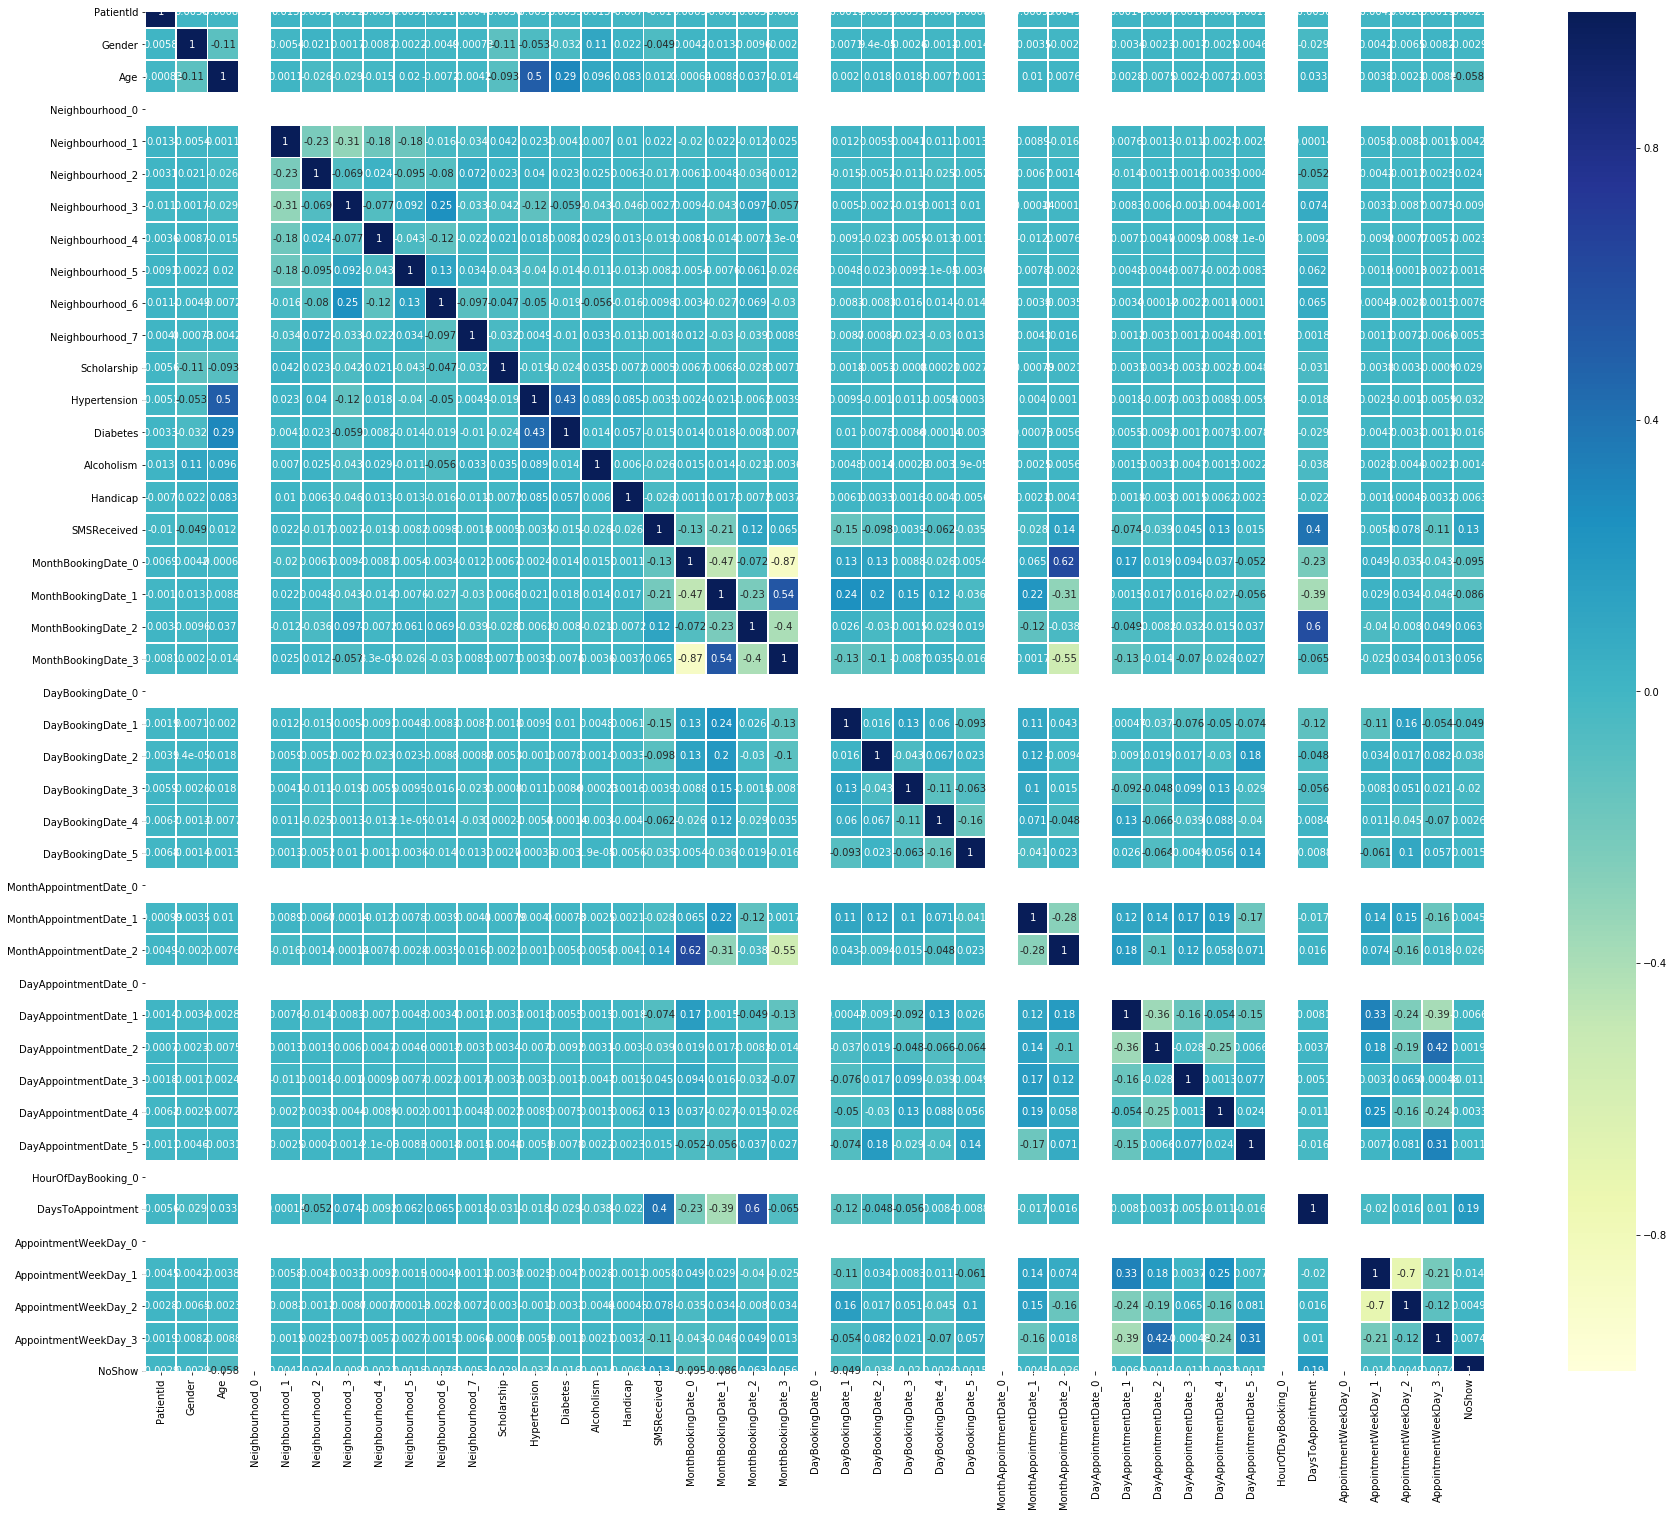

In [11]:
plt.rcParams['figure.figsize']=(30,25)
sns.heatmap(raw_train.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

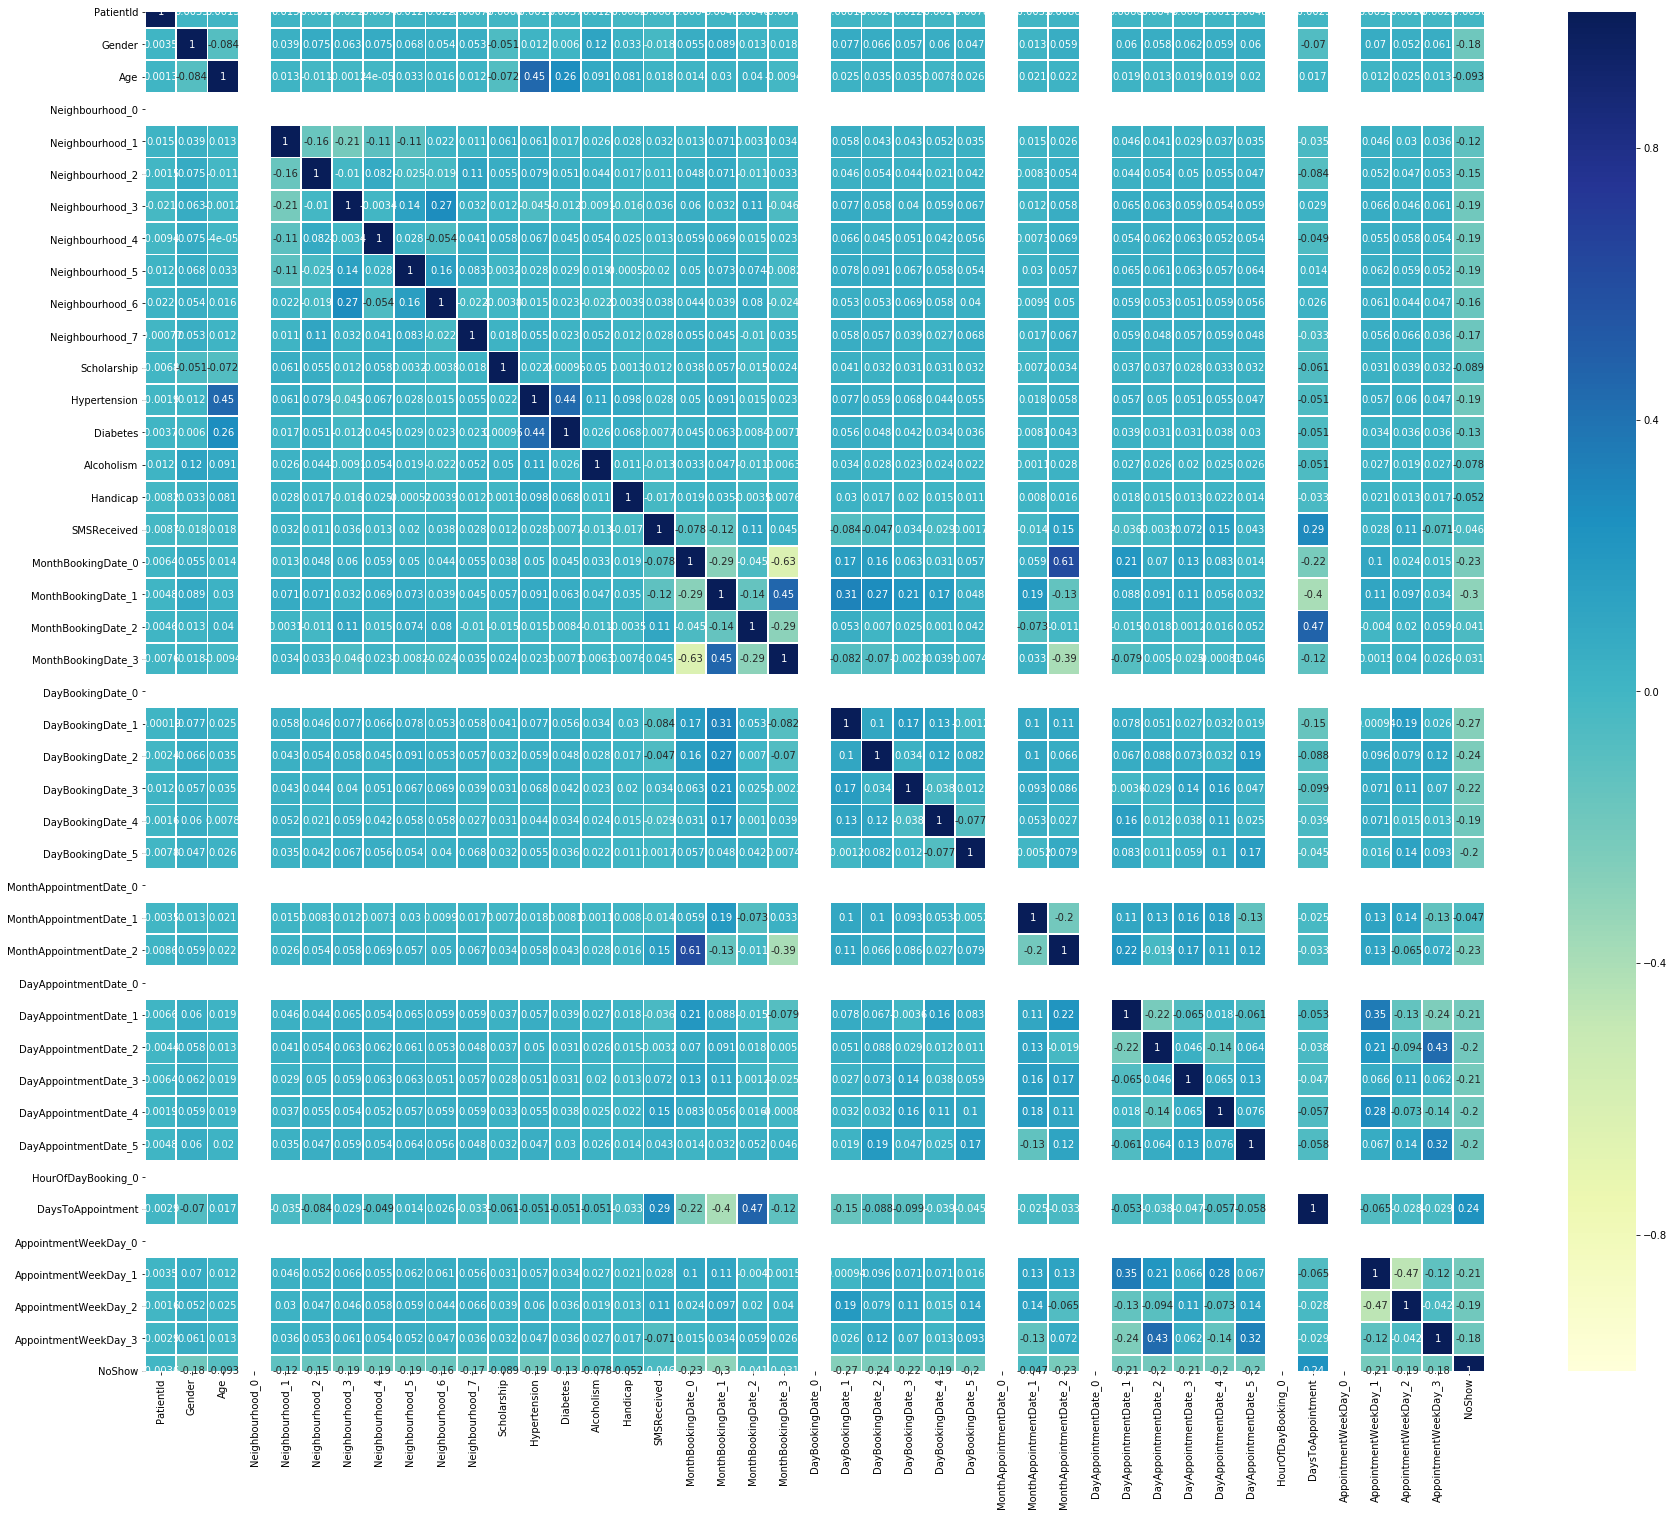

In [21]:
plt.rcParams['figure.figsize']=(30,25)
sns.heatmap(SMOTETomek_train.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

In [23]:
drop_zeros=['MonthAppointmentDate_0', 'AppointmentWeekDay_0','AppointmentWeekDay_0','HourOfDayBooking_0', 'DayAppointmentDate_0','MonthBookingDate_0','Neighbourhood_0','DayBookingDate_0',]
columns_without_zeros = [ item for item in SMOTETomek_train.columns if item not in drop_features ]
columns_without_zeros

['PatientId',
 'Gender',
 'Age',
 'Neighbourhood_1',
 'Neighbourhood_2',
 'Neighbourhood_3',
 'Neighbourhood_4',
 'Neighbourhood_5',
 'Neighbourhood_6',
 'Neighbourhood_7',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'MonthBookingDate_1',
 'MonthBookingDate_2',
 'MonthBookingDate_3',
 'DayBookingDate_1',
 'DayBookingDate_2',
 'DayBookingDate_3',
 'DayBookingDate_4',
 'DayBookingDate_5',
 'MonthAppointmentDate_1',
 'MonthAppointmentDate_2',
 'DayAppointmentDate_1',
 'DayAppointmentDate_2',
 'DayAppointmentDate_3',
 'DayAppointmentDate_4',
 'DayAppointmentDate_5',
 'DaysToAppointment',
 'AppointmentWeekDay_1',
 'AppointmentWeekDay_2',
 'AppointmentWeekDay_3',
 'NoShow']

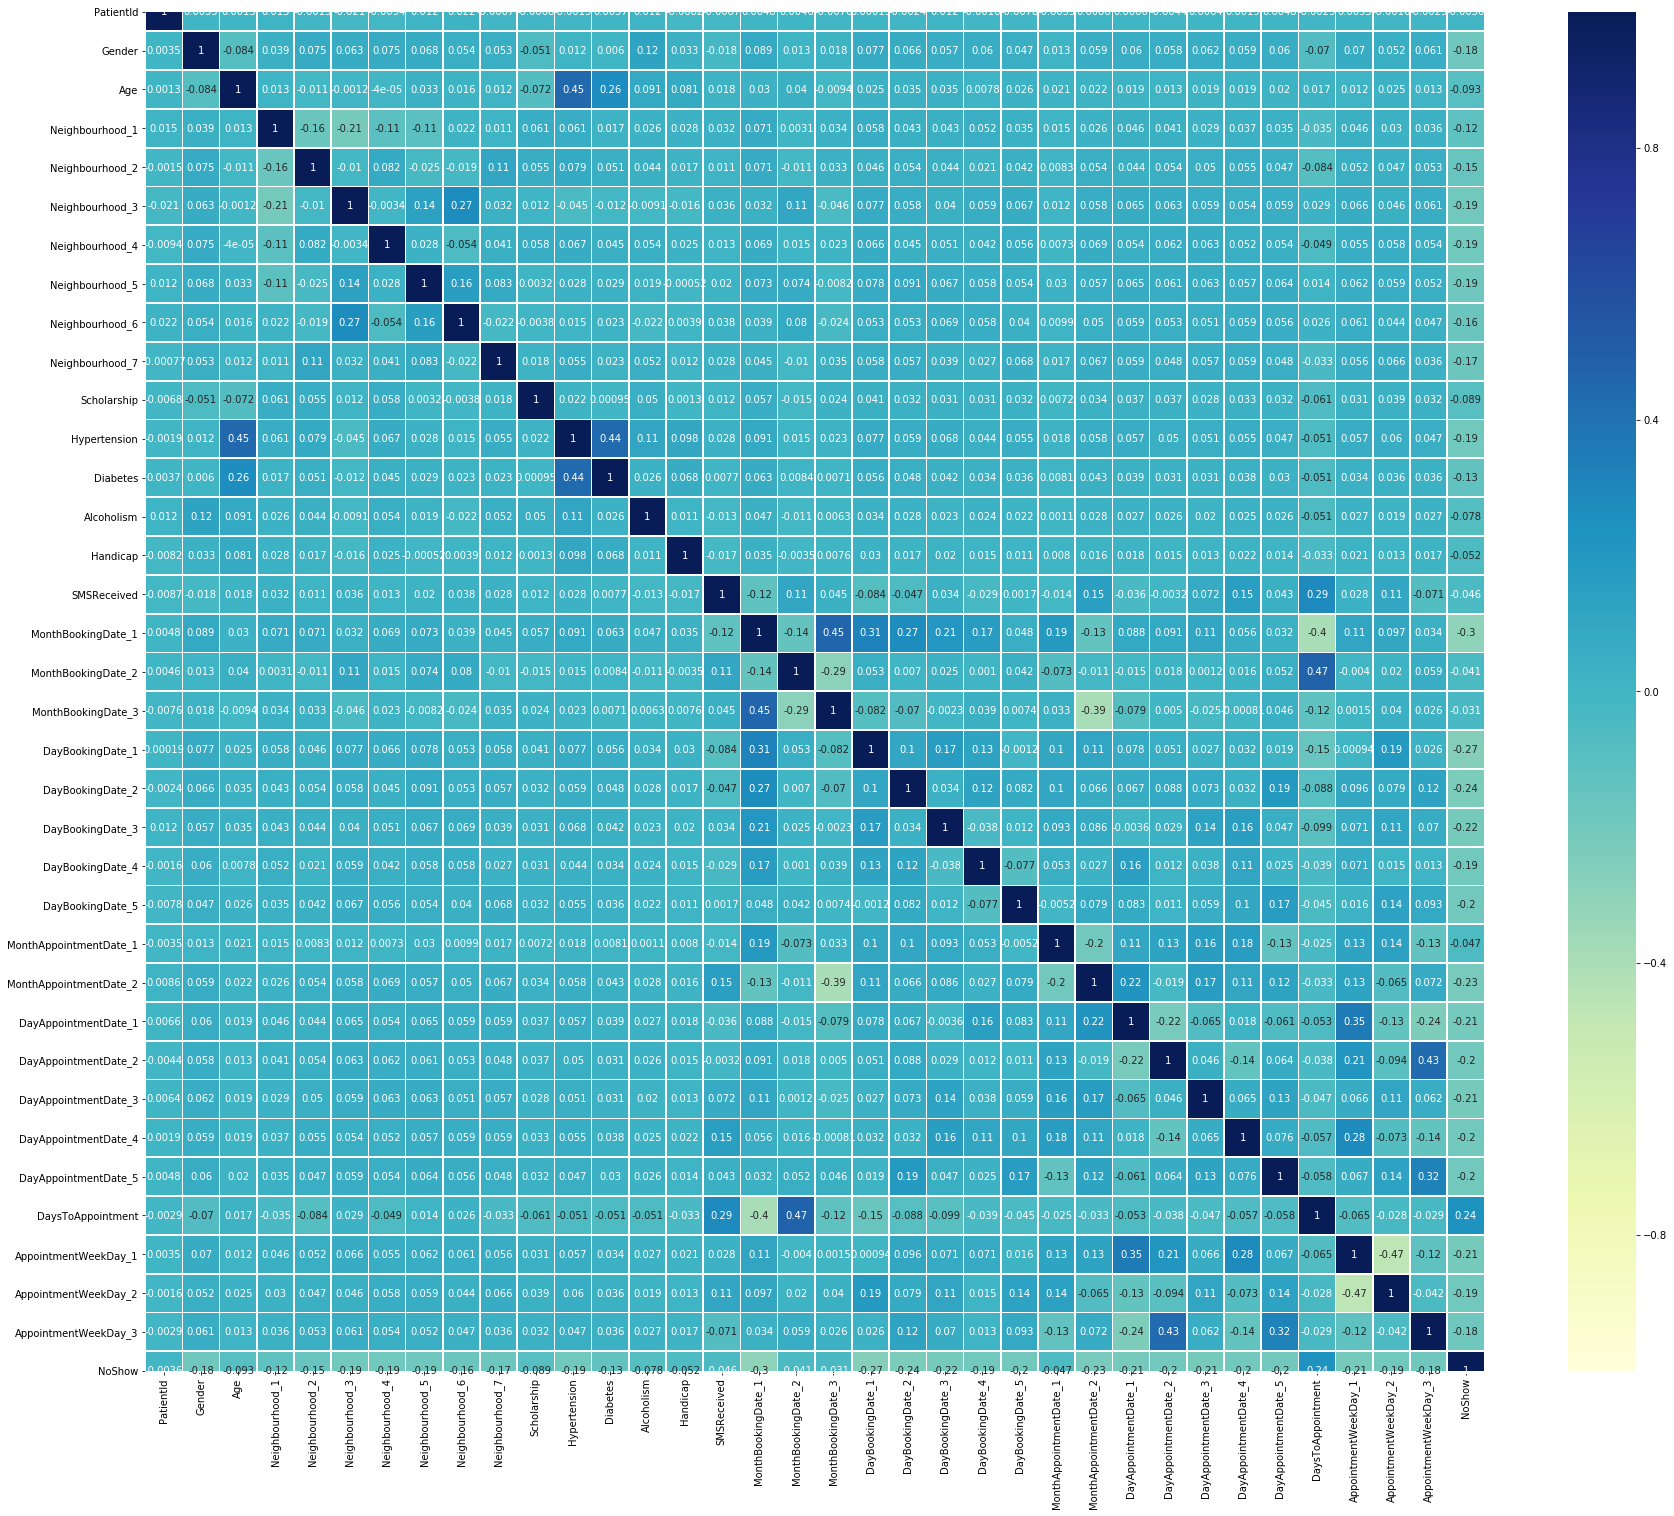

In [34]:
plt.rcParams['figure.figsize']=(30,25)
sns.heatmap(SMOTETomek_train[columns_without_zeros].corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");

In [35]:
SMOTETomek_train['AppointmentWeekDay_0'].nunique()


1

In [36]:
SMOTETomek_train['AppointmentWeekDay_0'].unique()


array([0], dtype=int64)

In [19]:
# features = ['PatientId', 'Gender', 'Age', 'Neighbourhood_0', 'Neighbourhood_1',
#        'Neighbourhood_2', 'Neighbourhood_3', 'Neighbourhood_4',
#        'Neighbourhood_5', 'Neighbourhood_6', 'Neighbourhood_7', 'Scholarship',
#        'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived',
#        'MonthBookingDate_0', 'MonthBookingDate_1', 'MonthBookingDate_2',
#        'MonthBookingDate_3', 'DayBookingDate_0', 'DayBookingDate_1',
#        'DayBookingDate_2', 'DayBookingDate_3', 'DayBookingDate_4',
#        'DayBookingDate_5', 'MonthAppointmentDate_0', 'MonthAppointmentDate_1',
#        'MonthAppointmentDate_2', 'DayAppointmentDate_0',
#        'DayAppointmentDate_1', 'DayAppointmentDate_2', 'DayAppointmentDate_3',
#        'DayAppointmentDate_4', 'DayAppointmentDate_5', 'HourOfDayBooking_0',
#        'DaysToAppointment', 'AppointmentWeekDay_0', 'AppointmentWeekDay_1',
#        'AppointmentWeekDay_2', 'AppointmentWeekDay_3']

train = raw_train
features =list(( train.loc[:, train.columns != 'NoShow']).columns)
features
 

['PatientId',
 'Gender',
 'Age',
 'Neighbourhood_0',
 'Neighbourhood_1',
 'Neighbourhood_2',
 'Neighbourhood_3',
 'Neighbourhood_4',
 'Neighbourhood_5',
 'Neighbourhood_6',
 'Neighbourhood_7',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'MonthBookingDate_0',
 'MonthBookingDate_1',
 'MonthBookingDate_2',
 'MonthBookingDate_3',
 'DayBookingDate_0',
 'DayBookingDate_1',
 'DayBookingDate_2',
 'DayBookingDate_3',
 'DayBookingDate_4',
 'DayBookingDate_5',
 'MonthAppointmentDate_0',
 'MonthAppointmentDate_1',
 'MonthAppointmentDate_2',
 'DayAppointmentDate_0',
 'DayAppointmentDate_1',
 'DayAppointmentDate_2',
 'DayAppointmentDate_3',
 'DayAppointmentDate_4',
 'DayAppointmentDate_5',
 'HourOfDayBooking_0',
 'DaysToAppointment',
 'AppointmentWeekDay_0',
 'AppointmentWeekDay_1',
 'AppointmentWeekDay_2',
 'AppointmentWeekDay_3']

In [18]:
drop_features=['MonthAppointmentDate_0', 'AppointmentWeekDay_0','AppointmentWeekDay_0','HourOfDayBooking_0', 'DayAppointmentDate_0','MonthBookingDate_0','Neighbourhood_0','DayBookingDate_0',]
features = [ item for item in features if item not in drop_features ]
features

['PatientId',
 'Gender',
 'Age',
 'Neighbourhood_1',
 'Neighbourhood_2',
 'Neighbourhood_3',
 'Neighbourhood_4',
 'Neighbourhood_5',
 'Neighbourhood_6',
 'Neighbourhood_7',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMSReceived',
 'MonthBookingDate_1',
 'MonthBookingDate_2',
 'MonthBookingDate_3',
 'DayBookingDate_1',
 'DayBookingDate_2',
 'DayBookingDate_3',
 'DayBookingDate_4',
 'DayBookingDate_5',
 'MonthAppointmentDate_1',
 'MonthAppointmentDate_2',
 'DayAppointmentDate_1',
 'DayAppointmentDate_2',
 'DayAppointmentDate_3',
 'DayAppointmentDate_4',
 'DayAppointmentDate_5',
 'DaysToAppointment',
 'AppointmentWeekDay_1',
 'AppointmentWeekDay_2',
 'AppointmentWeekDay_3']

In [71]:
def draw_feature_importances(train, test, model, drop_features):
    y_train = train["NoShow"]
    y_test = test["NoShow"]
#     X_train = train.loc[:, train.columns != 'NoShow']
#     X_test = test.loc[:, test.columns != 'NoShow']
#     features=train.loc[:, train.columns != 'NoShow']
#     features=features.columns
    #features = train.loc[:, train.columns != 'NoShow']
    all_features =list((train.loc[:, train.columns != 'NoShow']).columns)
    features = [ item for item in all_features if item not in drop_features ]
    X_train =  train[features]
    X_test =  test[features]
    X = train[features] 
    model.fit(X_train, y_train)

    print('features:{}'.format(features))
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(20, 15))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), model.feature_importances_[indices],
           color="b", align="center")
    plt.xticks(range(X.shape[1]), [ features[x] for x in indices])
    plt.xticks(rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

features:['PatientId', 'Gender', 'Age', 'Neighbourhood_0', 'Neighbourhood_1', 'Neighbourhood_2', 'Neighbourhood_3', 'Neighbourhood_4', 'Neighbourhood_5', 'Neighbourhood_6', 'Neighbourhood_7', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'MonthBookingDate_0', 'MonthBookingDate_1', 'MonthBookingDate_2', 'MonthBookingDate_3', 'DayBookingDate_0', 'DayBookingDate_1', 'DayBookingDate_2', 'DayBookingDate_3', 'DayBookingDate_4', 'DayBookingDate_5', 'MonthAppointmentDate_0', 'MonthAppointmentDate_1', 'MonthAppointmentDate_2', 'DayAppointmentDate_0', 'DayAppointmentDate_1', 'DayAppointmentDate_2', 'DayAppointmentDate_3', 'DayAppointmentDate_4', 'DayAppointmentDate_5', 'HourOfDayBooking_0', 'DaysToAppointment', 'AppointmentWeekDay_0', 'AppointmentWeekDay_1', 'AppointmentWeekDay_2', 'AppointmentWeekDay_3']


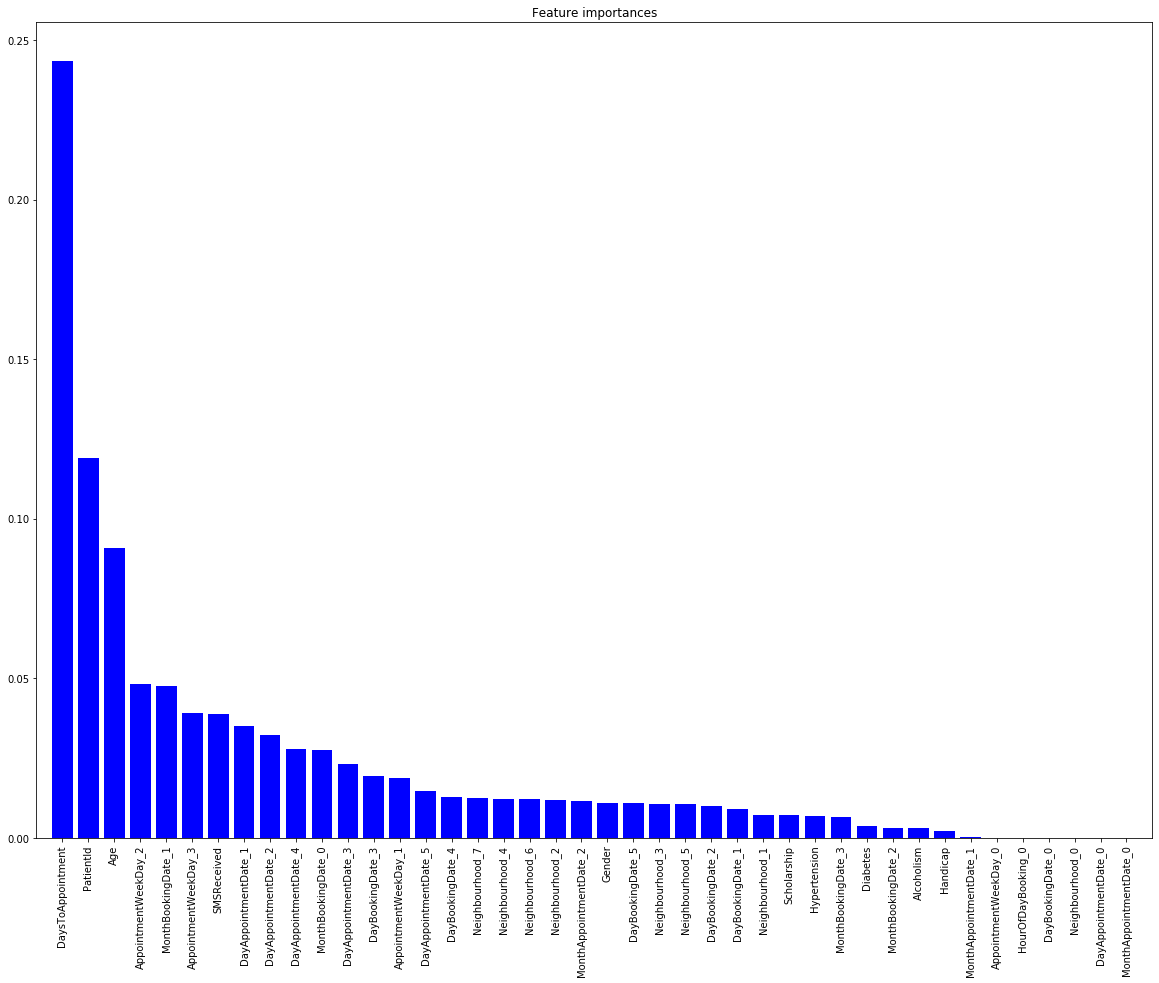

In [73]:
draw_feature_importances(SMOTETomek_train, SMOTETomek_test, DecisionTreeClassifier(),[])    

features:['PatientId', 'Gender', 'Age', 'Neighbourhood_1', 'Neighbourhood_2', 'Neighbourhood_3', 'Neighbourhood_4', 'Neighbourhood_5', 'Neighbourhood_6', 'Neighbourhood_7', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'MonthBookingDate_1', 'MonthBookingDate_2', 'MonthBookingDate_3', 'DayBookingDate_1', 'DayBookingDate_2', 'DayBookingDate_3', 'DayBookingDate_4', 'DayBookingDate_5', 'MonthAppointmentDate_1', 'MonthAppointmentDate_2', 'DayAppointmentDate_1', 'DayAppointmentDate_2', 'DayAppointmentDate_3', 'DayAppointmentDate_4', 'DayAppointmentDate_5', 'DaysToAppointment', 'AppointmentWeekDay_1', 'AppointmentWeekDay_2', 'AppointmentWeekDay_3']


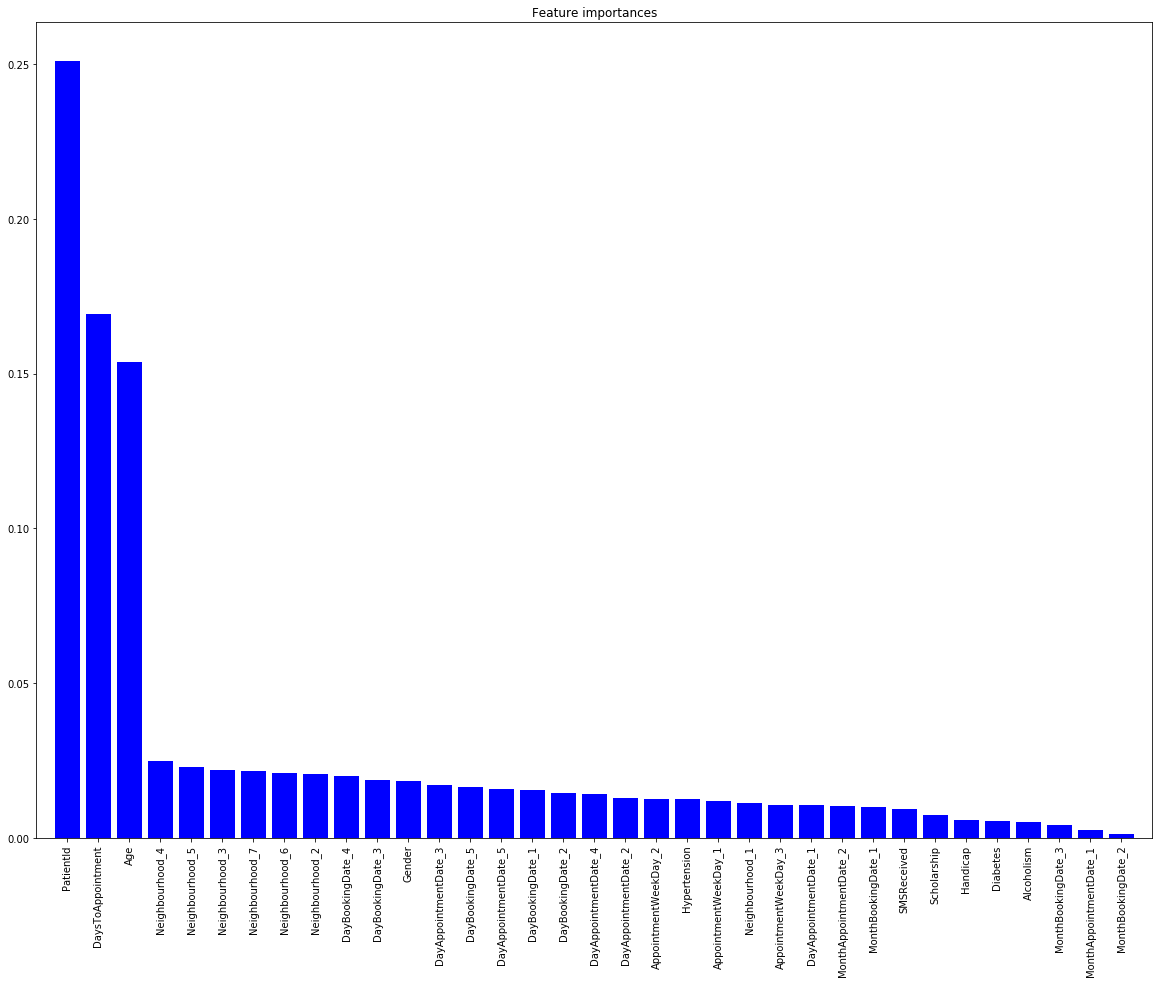

In [74]:

draw_feature_importances(raw_train, raw_test, DecisionTreeClassifier(),drop_features)                

features:['PatientId', 'Gender', 'Age', 'Neighbourhood_0', 'Neighbourhood_1', 'Neighbourhood_2', 'Neighbourhood_3', 'Neighbourhood_4', 'Neighbourhood_5', 'Neighbourhood_6', 'Neighbourhood_7', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'MonthBookingDate_0', 'MonthBookingDate_1', 'MonthBookingDate_2', 'MonthBookingDate_3', 'DayBookingDate_0', 'DayBookingDate_1', 'DayBookingDate_2', 'DayBookingDate_3', 'DayBookingDate_4', 'DayBookingDate_5', 'MonthAppointmentDate_0', 'MonthAppointmentDate_1', 'MonthAppointmentDate_2', 'DayAppointmentDate_0', 'DayAppointmentDate_1', 'DayAppointmentDate_2', 'DayAppointmentDate_3', 'DayAppointmentDate_4', 'DayAppointmentDate_5', 'HourOfDayBooking_0', 'DaysToAppointment', 'AppointmentWeekDay_0', 'AppointmentWeekDay_1', 'AppointmentWeekDay_2', 'AppointmentWeekDay_3']


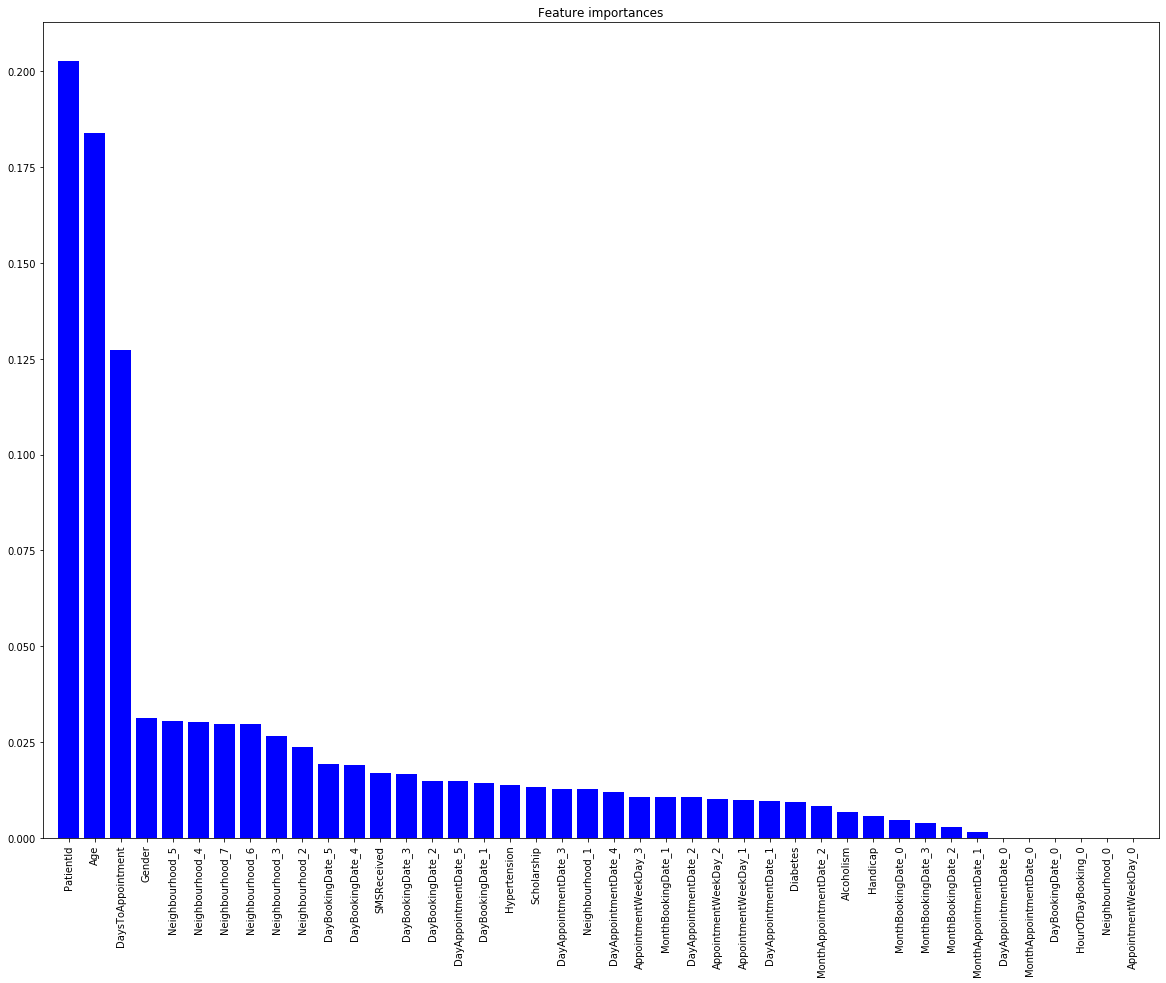

In [75]:
draw_feature_importances(raw_train, raw_test, RandomForestClassifier(),[drop_features]) 

features:['PatientId', 'Gender', 'Age', 'Neighbourhood_1', 'Neighbourhood_2', 'Neighbourhood_3', 'Neighbourhood_4', 'Neighbourhood_5', 'Neighbourhood_6', 'Neighbourhood_7', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'MonthBookingDate_1', 'MonthBookingDate_2', 'MonthBookingDate_3', 'DayBookingDate_1', 'DayBookingDate_2', 'DayBookingDate_3', 'DayBookingDate_4', 'DayBookingDate_5', 'MonthAppointmentDate_1', 'MonthAppointmentDate_2', 'DayAppointmentDate_1', 'DayAppointmentDate_2', 'DayAppointmentDate_3', 'DayAppointmentDate_4', 'DayAppointmentDate_5', 'DaysToAppointment', 'AppointmentWeekDay_1', 'AppointmentWeekDay_2', 'AppointmentWeekDay_3']


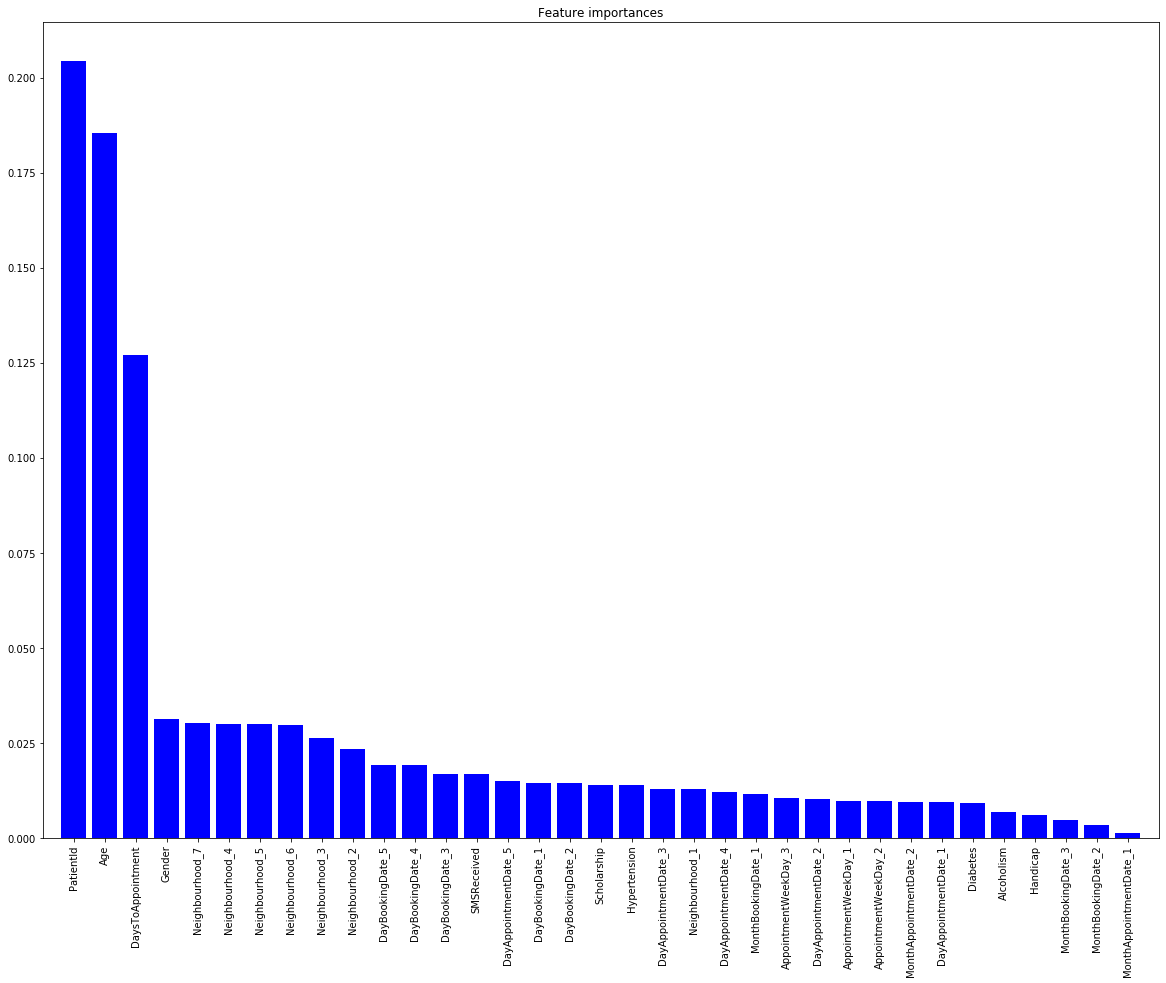

In [76]:
draw_feature_importances(raw_train, raw_test, RandomForestClassifier(),drop_features)                

features:['PatientId', 'Gender', 'Age', 'Neighbourhood_1', 'Neighbourhood_2', 'Neighbourhood_3', 'Neighbourhood_4', 'Neighbourhood_5', 'Neighbourhood_6', 'Neighbourhood_7', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'MonthBookingDate_1', 'MonthBookingDate_2', 'MonthBookingDate_3', 'DayBookingDate_1', 'DayBookingDate_2', 'DayBookingDate_3', 'DayBookingDate_4', 'DayBookingDate_5', 'MonthAppointmentDate_1', 'MonthAppointmentDate_2', 'DayAppointmentDate_1', 'DayAppointmentDate_2', 'DayAppointmentDate_3', 'DayAppointmentDate_4', 'DayAppointmentDate_5', 'DaysToAppointment', 'AppointmentWeekDay_1', 'AppointmentWeekDay_2', 'AppointmentWeekDay_3']


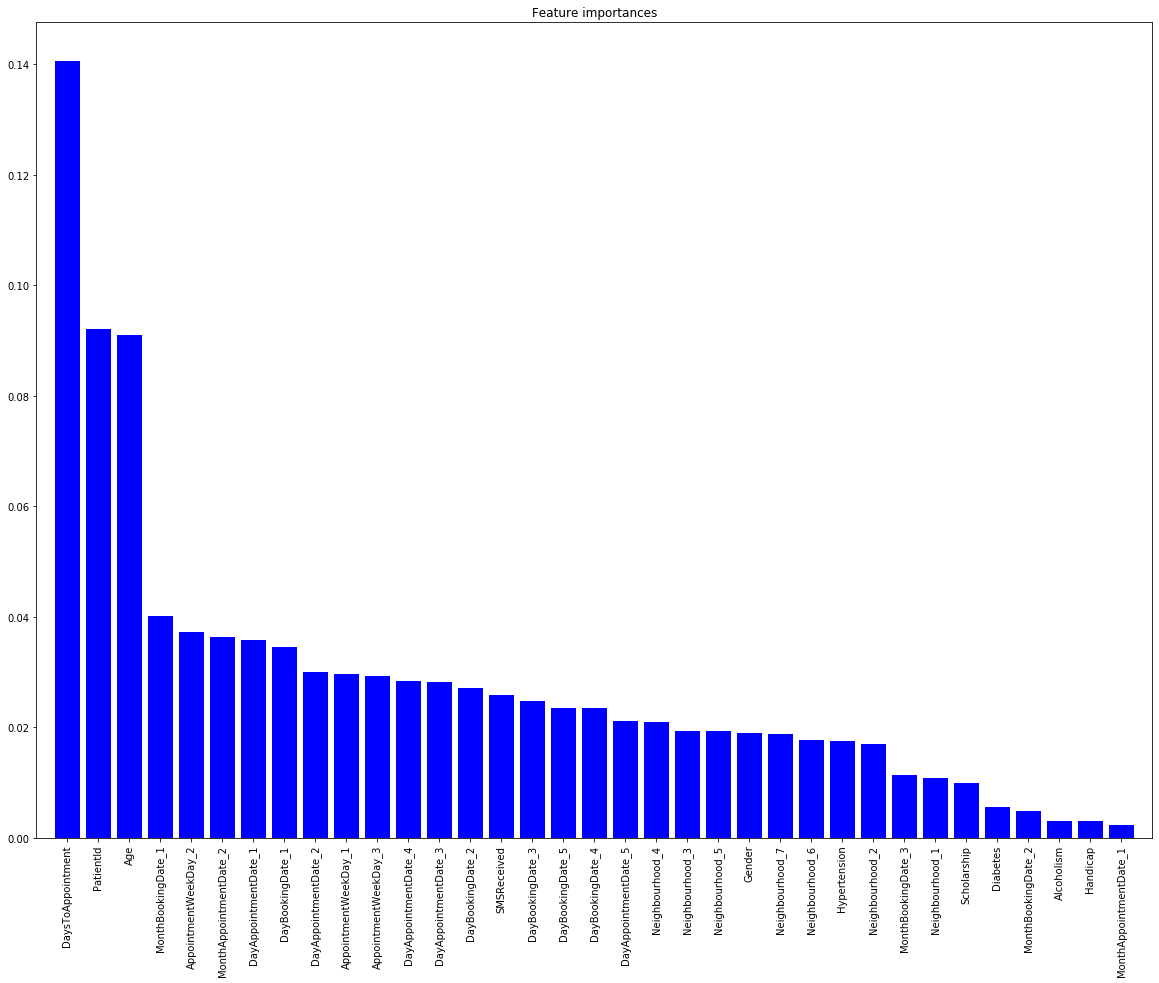

In [13]:
draw_feature_importances(SMOTETomek_train, raw_test, RandomForestClassifier(),drop_features)    

In [48]:
drop_features2=['MonthAppointmentDate_0', 'AppointmentWeekDay_0','AppointmentWeekDay_0','HourOfDayBooking_0', 'DayAppointmentDate_0','MonthBookingDate_0','Neighbourhood_0','DayBookingDate_0','MonthBookingDate_1','Handicap','Alcoholism', 'Diabetes', 'MonthBookingDate_1','MonthAppointmentDate_1',  'MonthBookingDate_2']

features:['PatientId', 'Gender', 'Age', 'Neighbourhood_1', 'Neighbourhood_2', 'Neighbourhood_3', 'Neighbourhood_4', 'Neighbourhood_5', 'Neighbourhood_6', 'Neighbourhood_7', 'Scholarship', 'Hypertension', 'SMSReceived', 'MonthBookingDate_3', 'DayBookingDate_1', 'DayBookingDate_2', 'DayBookingDate_3', 'DayBookingDate_4', 'DayBookingDate_5', 'MonthAppointmentDate_2', 'DayAppointmentDate_1', 'DayAppointmentDate_2', 'DayAppointmentDate_3', 'DayAppointmentDate_4', 'DayAppointmentDate_5', 'DaysToAppointment', 'AppointmentWeekDay_1', 'AppointmentWeekDay_2', 'AppointmentWeekDay_3']


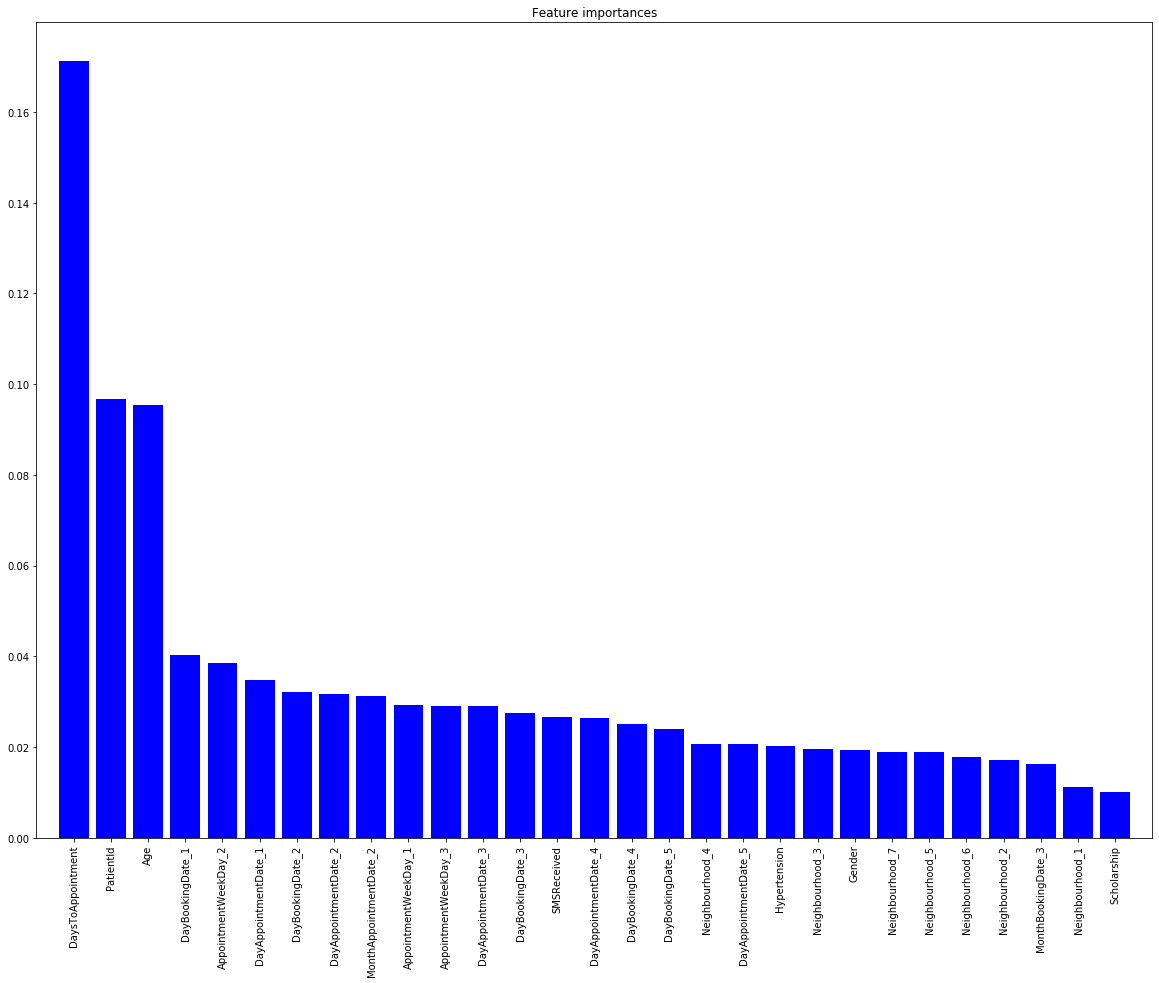

In [49]:
draw_feature_importances(SMOTETomek_train, raw_test, RandomForestClassifier(),drop_features2)    

In [13]:
features = ['PatientId', 'Gender', 'Age', 'Neighbourhood_0', 'Neighbourhood_1',
       'Neighbourhood_2', 'Neighbourhood_3', 'Neighbourhood_4',
       'Neighbourhood_5', 'Neighbourhood_6', 'Neighbourhood_7', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived',
       'MonthBookingDate_0', 'MonthBookingDate_1', 'MonthBookingDate_2',
       'MonthBookingDate_3', 'DayBookingDate_0', 'DayBookingDate_1',
       'DayBookingDate_2', 'DayBookingDate_3', 'DayBookingDate_4',
       'DayBookingDate_5', 'MonthAppointmentDate_0', 'MonthAppointmentDate_1',
       'MonthAppointmentDate_2', 'DayAppointmentDate_0',
       'DayAppointmentDate_1', 'DayAppointmentDate_2', 'DayAppointmentDate_3',
       'DayAppointmentDate_4', 'DayAppointmentDate_5', 'HourOfDayBooking_0',
       'DaysToAppointment', 'AppointmentWeekDay_0', 'AppointmentWeekDay_1',
       'AppointmentWeekDay_2', 'AppointmentWeekDay_3']

In [50]:
def model2(train, test, search, name, tags):
  
  print(search.get_params())
  y_train = train["NoShow"]
  y_test = test["NoShow"]

#   X_train = train.loc[:, train.columns != 'NoShow']
  all_features =list((train.loc[:, train.columns != 'NoShow']).columns)
  features = [ item for item in all_features if item not in drop_features2 ]
  print(drop_features2)
  X_train =  train[features]
  X_test = test[features]
                

  
  search = search.fit(X_train, y_train)
  if 'constant' in search.get_params():
  #if search.get_params().key[0] == ('constant'):
    search.best_params_ =np.nan

  search.best_params_

  y_pred = search.predict(X_test)
  print(y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy: %.2f%%" % (accuracy * 100.0))
  print(' f1 ', f1_score(y_test, y_pred), '\n',
        'recall', recall_score(y_test, y_pred), '\n',
        'precision', precision_score(y_test, y_pred) )

  neptune.create_experiment(
      name=name
  )

  neptune.log_metric('accuracy', accuracy)
  neptune.log_metric('f1', f1_score(y_test, y_pred))
  neptune.log_metric('recall', recall_score(y_test, y_pred))
  neptune.log_metric('precision', precision_score(y_test, y_pred))
  neptune.append_tags(tags)
  neptune.append_tags([str(search.best_params_),"Dominik Stępień "])
  from sklearn.metrics import confusion_matrix

  conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
  print('Confusion matrix:\n', conf_mat)

  from matplotlib import pyplot as plt

  labels = ['Class 0', 'Class 1']
  fig = plt.figure()
  ax = fig.add_subplot()
  cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels)
  ax.set_yticklabels([''] + labels)
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  neptune.log_image('Confusion_matrix ' + name, fig)
  
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, search.predict(X_test))
  print(false_positive_rate, true_positive_rate, thresholds)


  roc_auc_score(y_test, y_pred)
  auc = roc_auc_score(y_test, y_pred)
  neptune.log_metric('roc_auc', auc)
  fig = plt.figure()
  plt.plot(false_positive_rate,true_positive_rate,label="data 1, auc="+str(auc))
  plt.legend(loc=4)
  plt.show()
  neptune.log_image('ROC AUC ' + name, fig)


  neptune.stop()

In [51]:
logistic = LogisticRegression(tol=1e-2, max_iter=100,
                               random_state=0)
distributions = dict(C=uniform(loc=0, scale=4),
                      penalty=['l2', 'l1', 'elasticnet'],
                      solver=['newton-cg', 'lbfgs', 'liblinear'],#, 'sag', 'saga'], 
                  
                     )

In [52]:
clf = RandomizedSearchCV(logistic, 
                          distributions,
                          scoring = 'f1',
                          random_state=0,
                          cv=5,
                          verbose=1,
                          n_jobs = -1)

{'cv': 5, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': 0, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.01, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(random_state=0, tol=0.01), 'iid': 'deprecated', 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B397ADAA08>, 'penalty': ['l2', 'l1', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'pre_dispatch': '2*n_jobs', 'random_state': 0, 'refit': True, 'return_train_score': False, 'scoring': 'f1', 'verbose': 1}
['MonthAppointmentDate_0', 'AppointmentWeekDay_0', 'AppointmentWeekDay_0', 'HourOfDayBooking_0', 'DayAppointment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.7s finished
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line se

[0 0 0 ... 0 0 0]
Accuracy: 79.81%
 f1  0.0 
 recall 0.0 
 precision 0.0


NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/DataWorkshop-Foundation/Predicting-cancellation-of-visit/e/PCV-124
Confusion matrix:
 [[17465     0]
 [ 4418     0]]


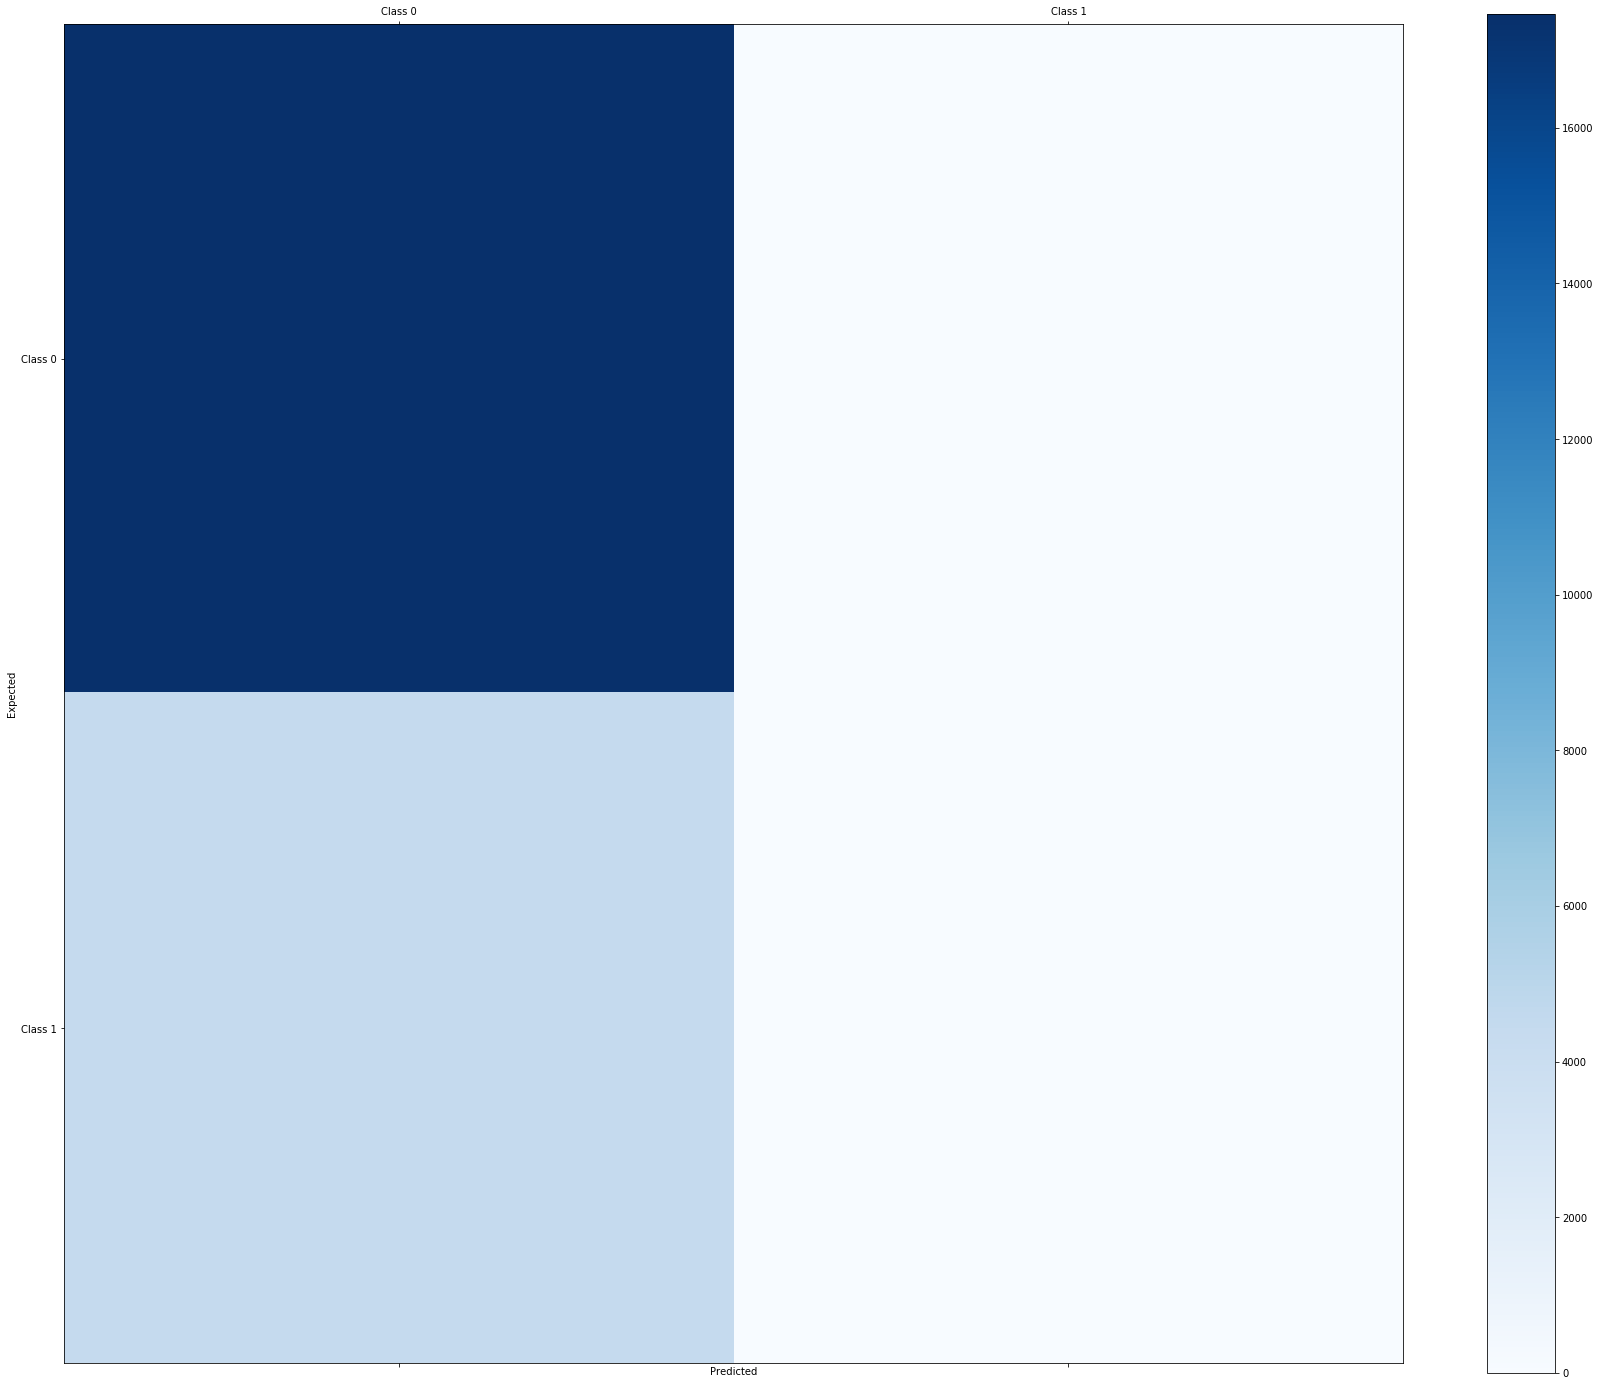

[0. 1.] [0. 1.] [1 0]


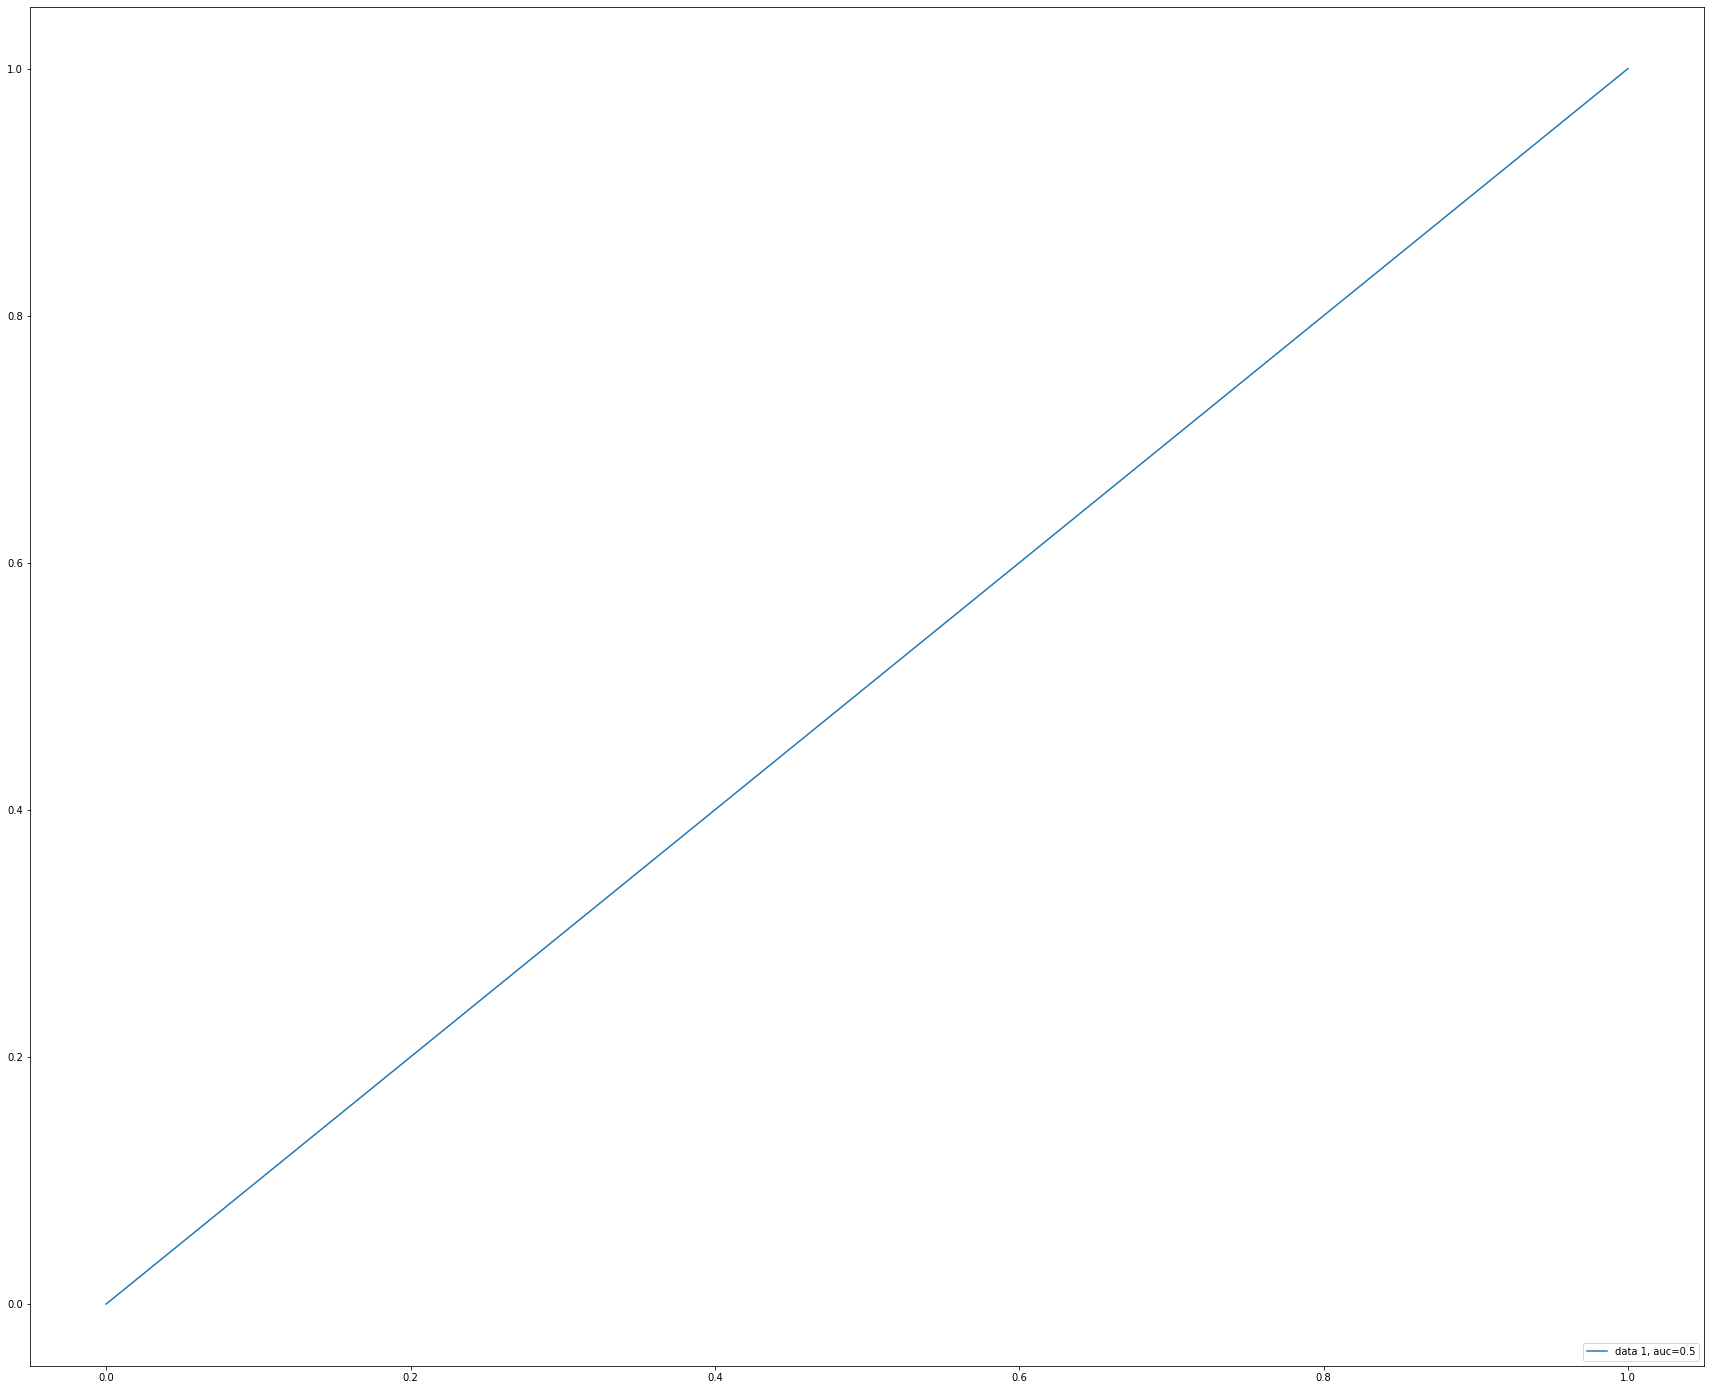

In [53]:
model2(raw_train, raw_test, clf, "LogisticRegression", ['Logistic Regression', 'Raw', 'Randomsearch', 'dropped_col0', 'MonthBookingDate_1','Handicap','Alcoholism', 'Diabetes', 'MonthBookingDate_1','MonthAppointmentDate_1',  'MonthBookingDate_2'])

{'cv': 5, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': 0, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.01, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(random_state=0, tol=0.01), 'iid': 'deprecated', 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B397ADAA08>, 'penalty': ['l2', 'l1', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'pre_dispatch': '2*n_jobs', 'random_state': 0, 'refit': True, 'return_train_score': False, 'scoring': 'f1', 'verbose': 1}
['MonthAppointmentDate_0', 'AppointmentWeekDay_0', 'AppointmentWeekDay_0', 'HourOfDayBooking_0', 'DayAppointment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.8s finished
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\

[1 0 0 ... 0 1 1]
Accuracy: 63.09%
 f1  0.5892732021147844 
 recall 0.5294757326007326 
 precision 0.6642969984202212


NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/DataWorkshop-Foundation/Predicting-cancellation-of-visit/e/PCV-125
Confusion matrix:
 [[12790  4675]
 [ 8221  9251]]


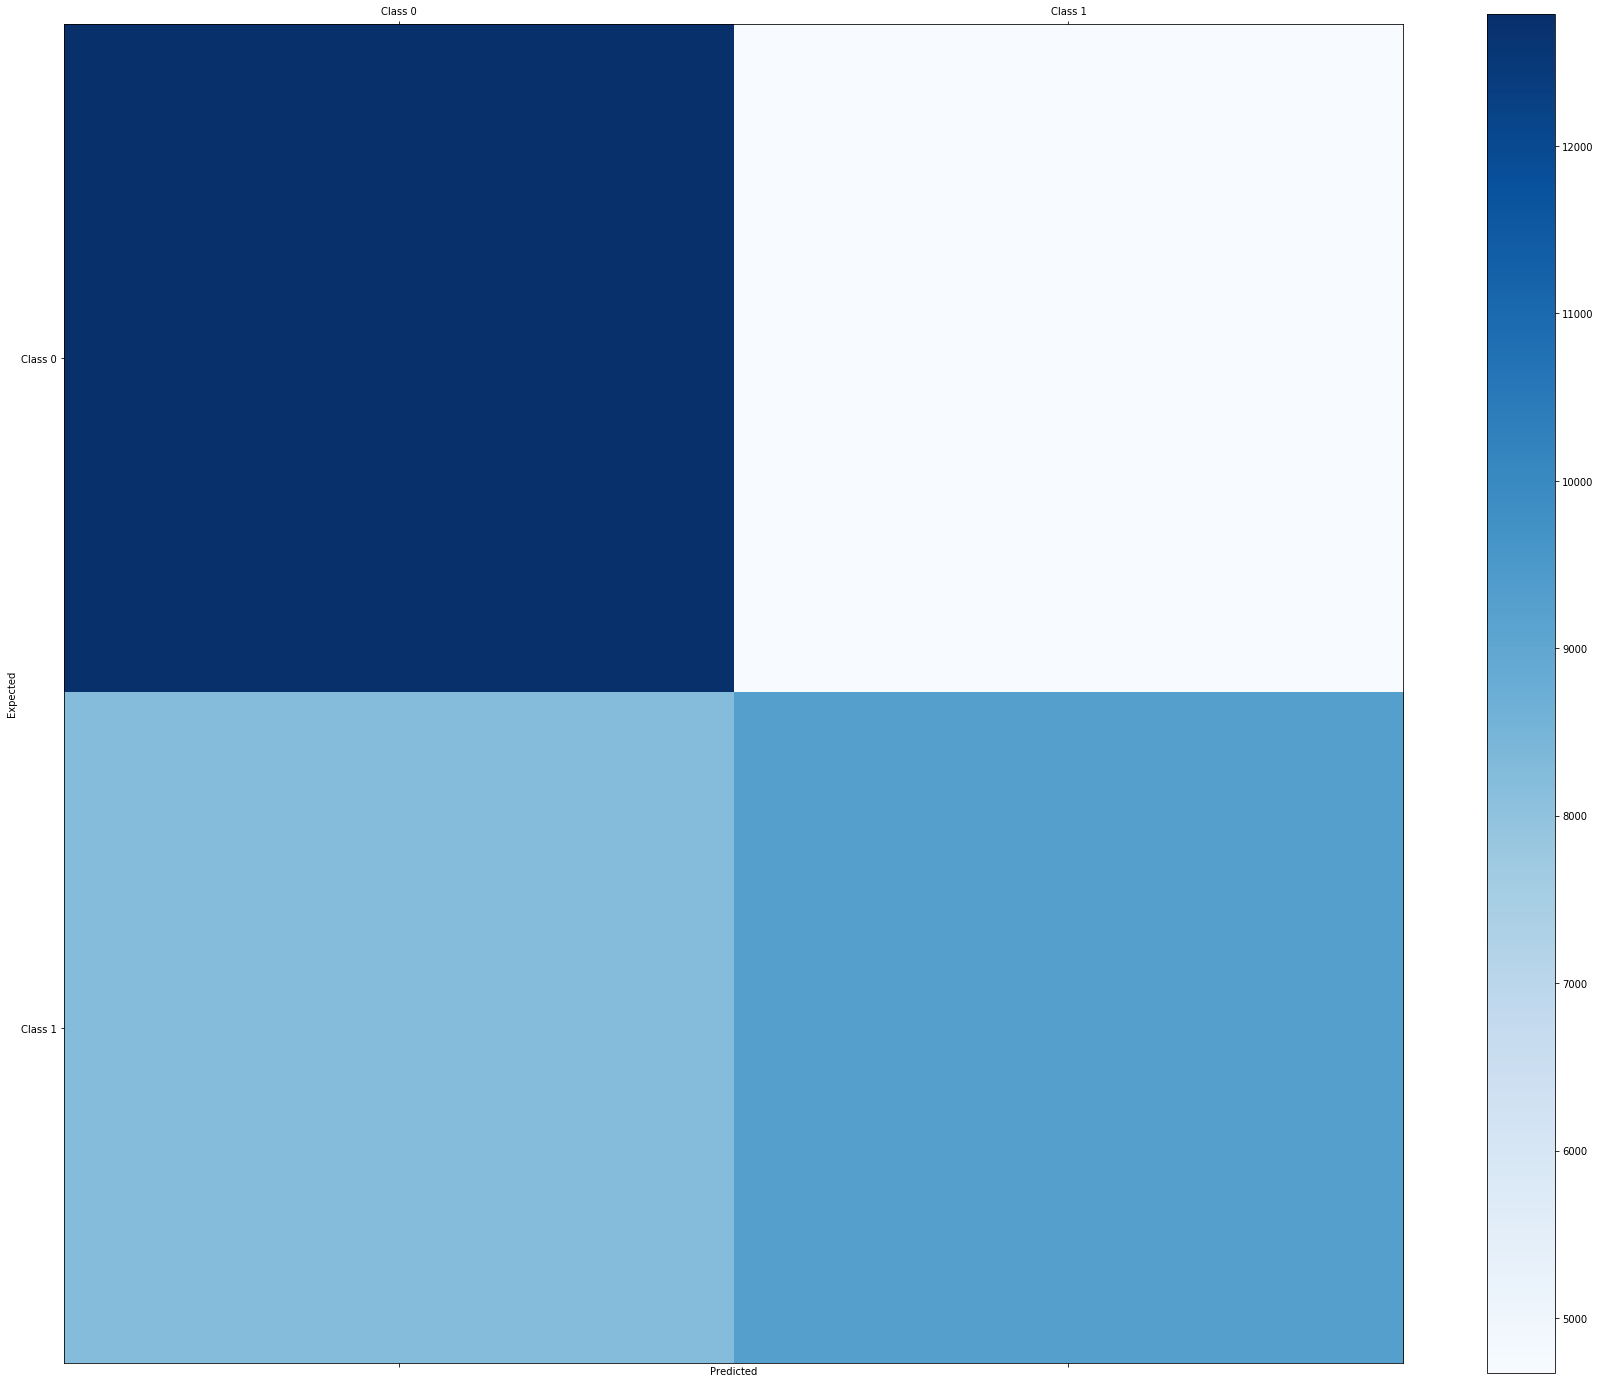

[0.         0.26767821 1.        ] [0.         0.52947573 1.        ] [2 1 0]


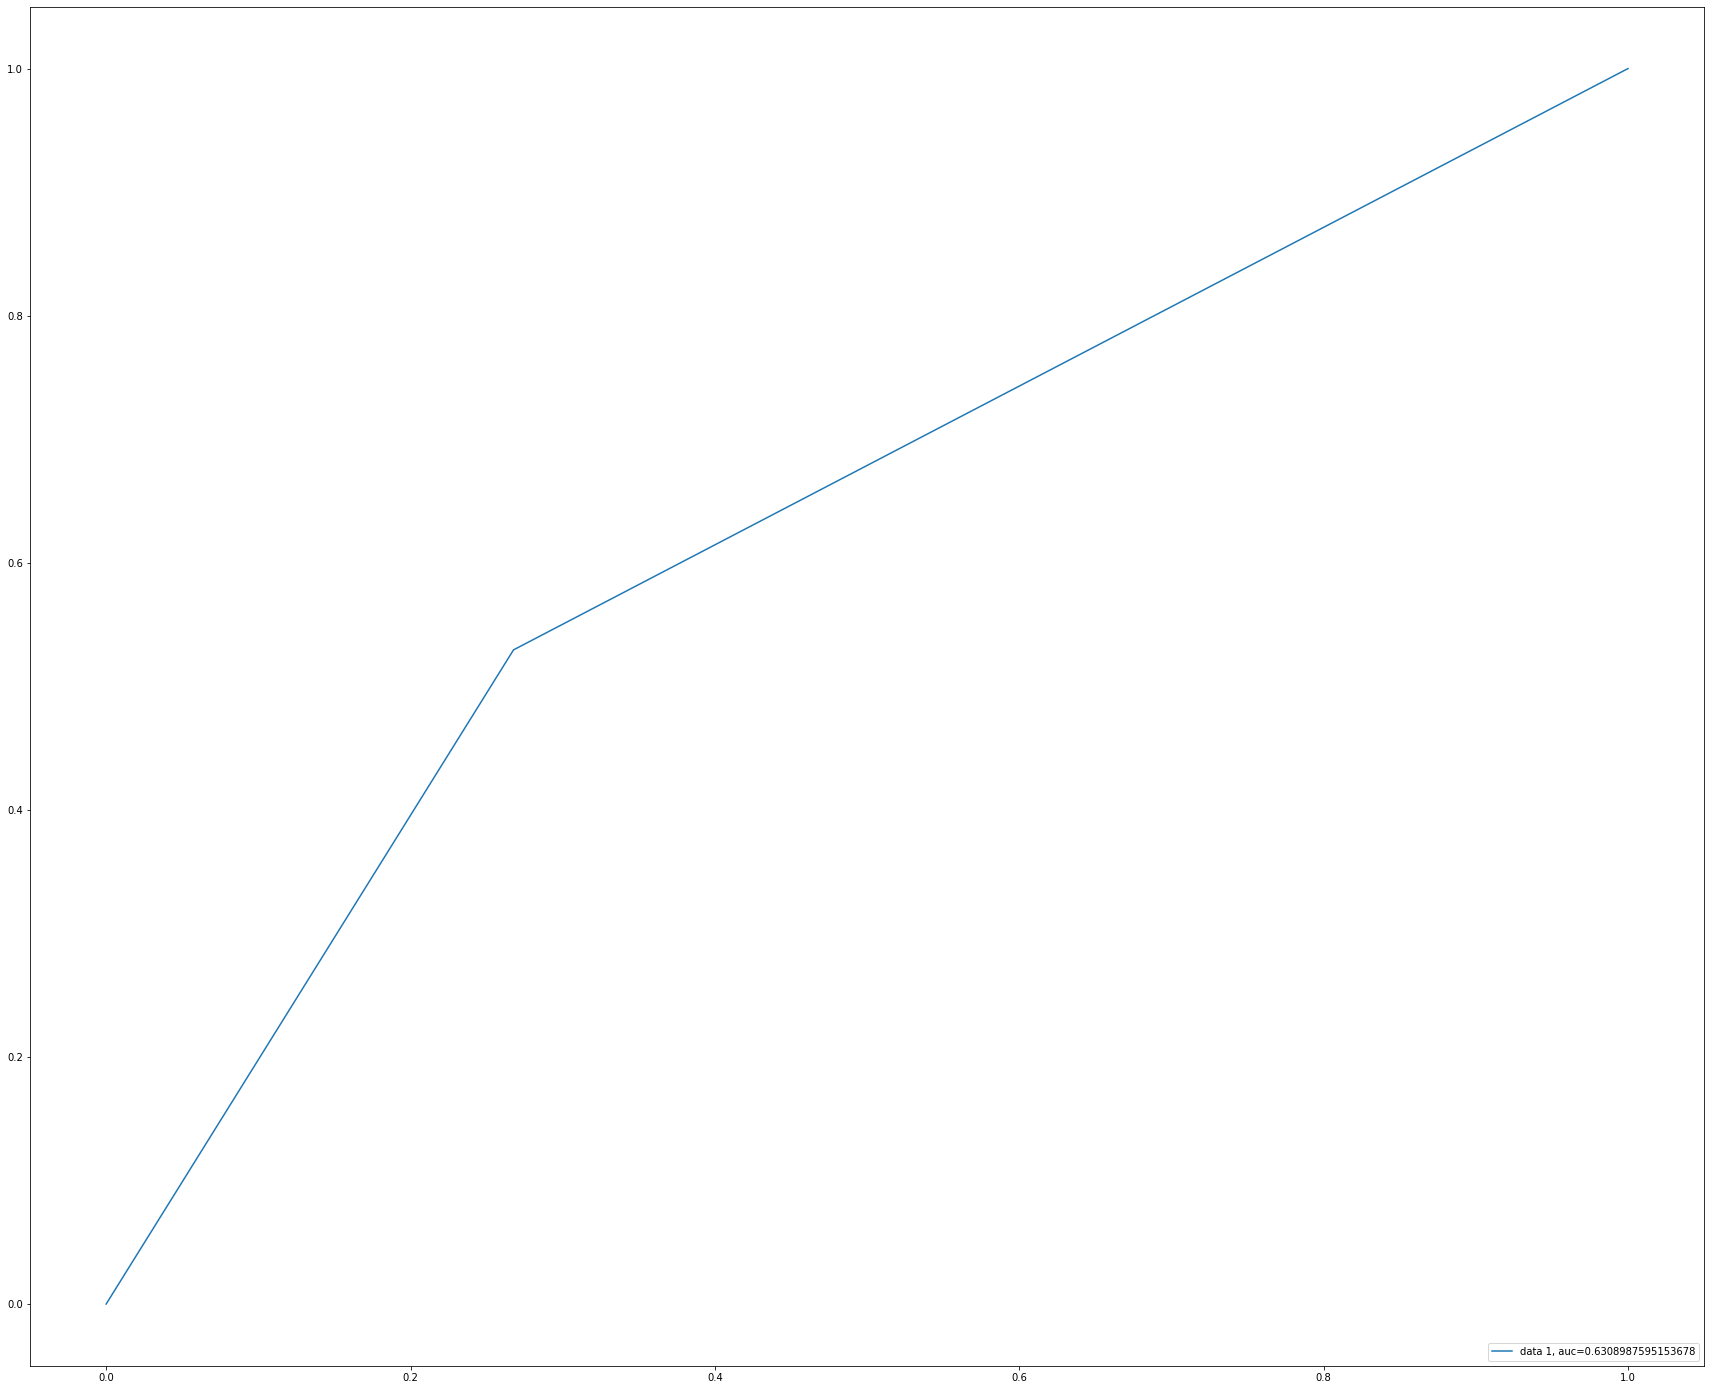

In [54]:
model2(Adasyn_train, Adasyn_test, clf,"LogisticRegression", ['Logistic Regression', 'Adasyn', 'Randomsearch','dropped_col 0', 'MonthBookingDate_1','Handicap','Alcoholism', 'Diabetes', 'MonthBookingDate_1','MonthAppointmentDate_1',  'MonthBookingDate_2'])

{'cv': 5, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': 0, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.01, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(random_state=0, tol=0.01), 'iid': 'deprecated', 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B397ADAA08>, 'penalty': ['l2', 'l1', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'pre_dispatch': '2*n_jobs', 'random_state': 0, 'refit': True, 'return_train_score': False, 'scoring': 'f1', 'verbose': 1}
['MonthAppointmentDate_0', 'AppointmentWeekDay_0', 'AppointmentWeekDay_0', 'HourOfDayBooking_0', 'DayAppointment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.0s finished
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\

[1 1 1 ... 0 1 0]
Accuracy: 75.71%
 f1  0.7405705996131529 
 recall 0.6933001358080579 
 precision 0.7947586922677737
https://ui.neptune.ai/DataWorkshop-Foundation/Predicting-cancellation-of-visit/e/PCV-126
Confusion matrix:
 [[3627  791]
 [1355 3063]]


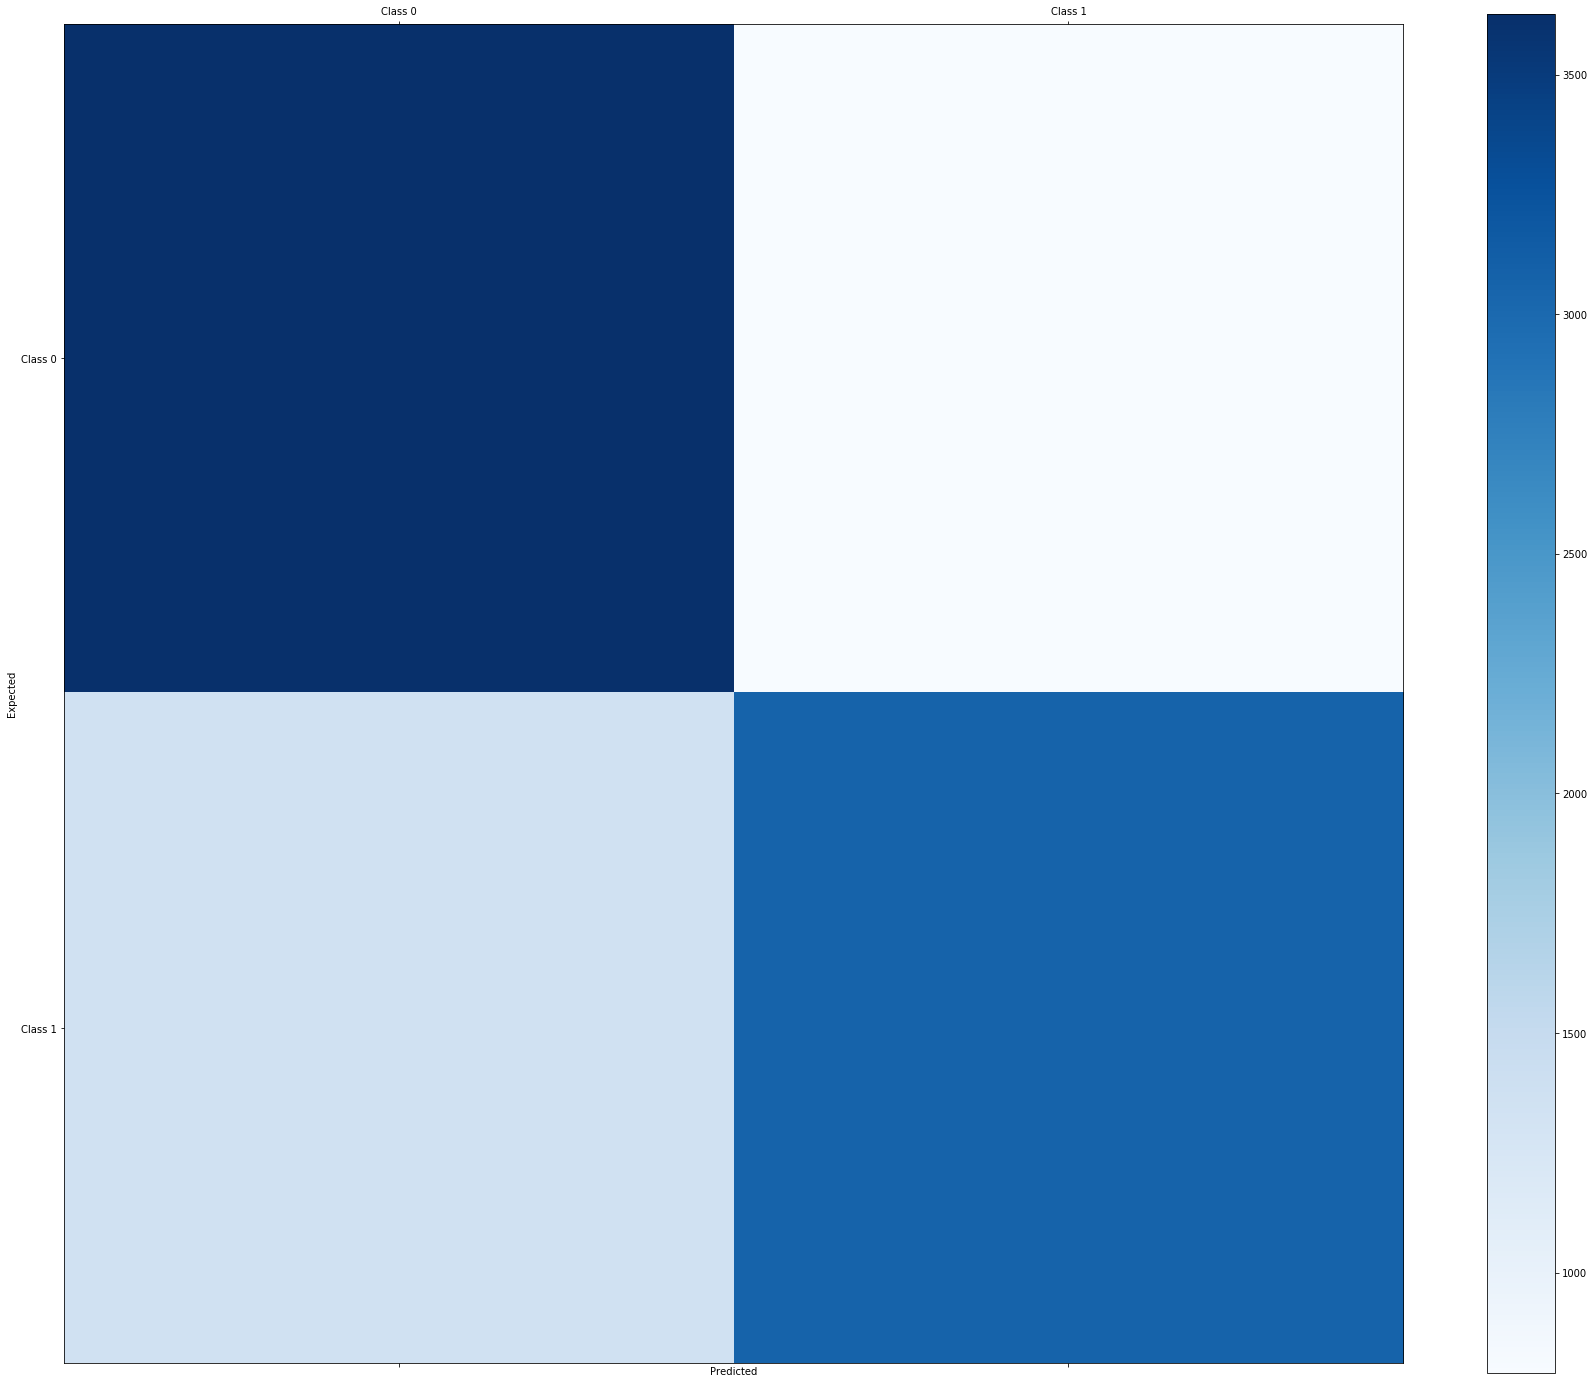

[0.         0.17904029 1.        ] [0.         0.69330014 1.        ] [2 1 0]


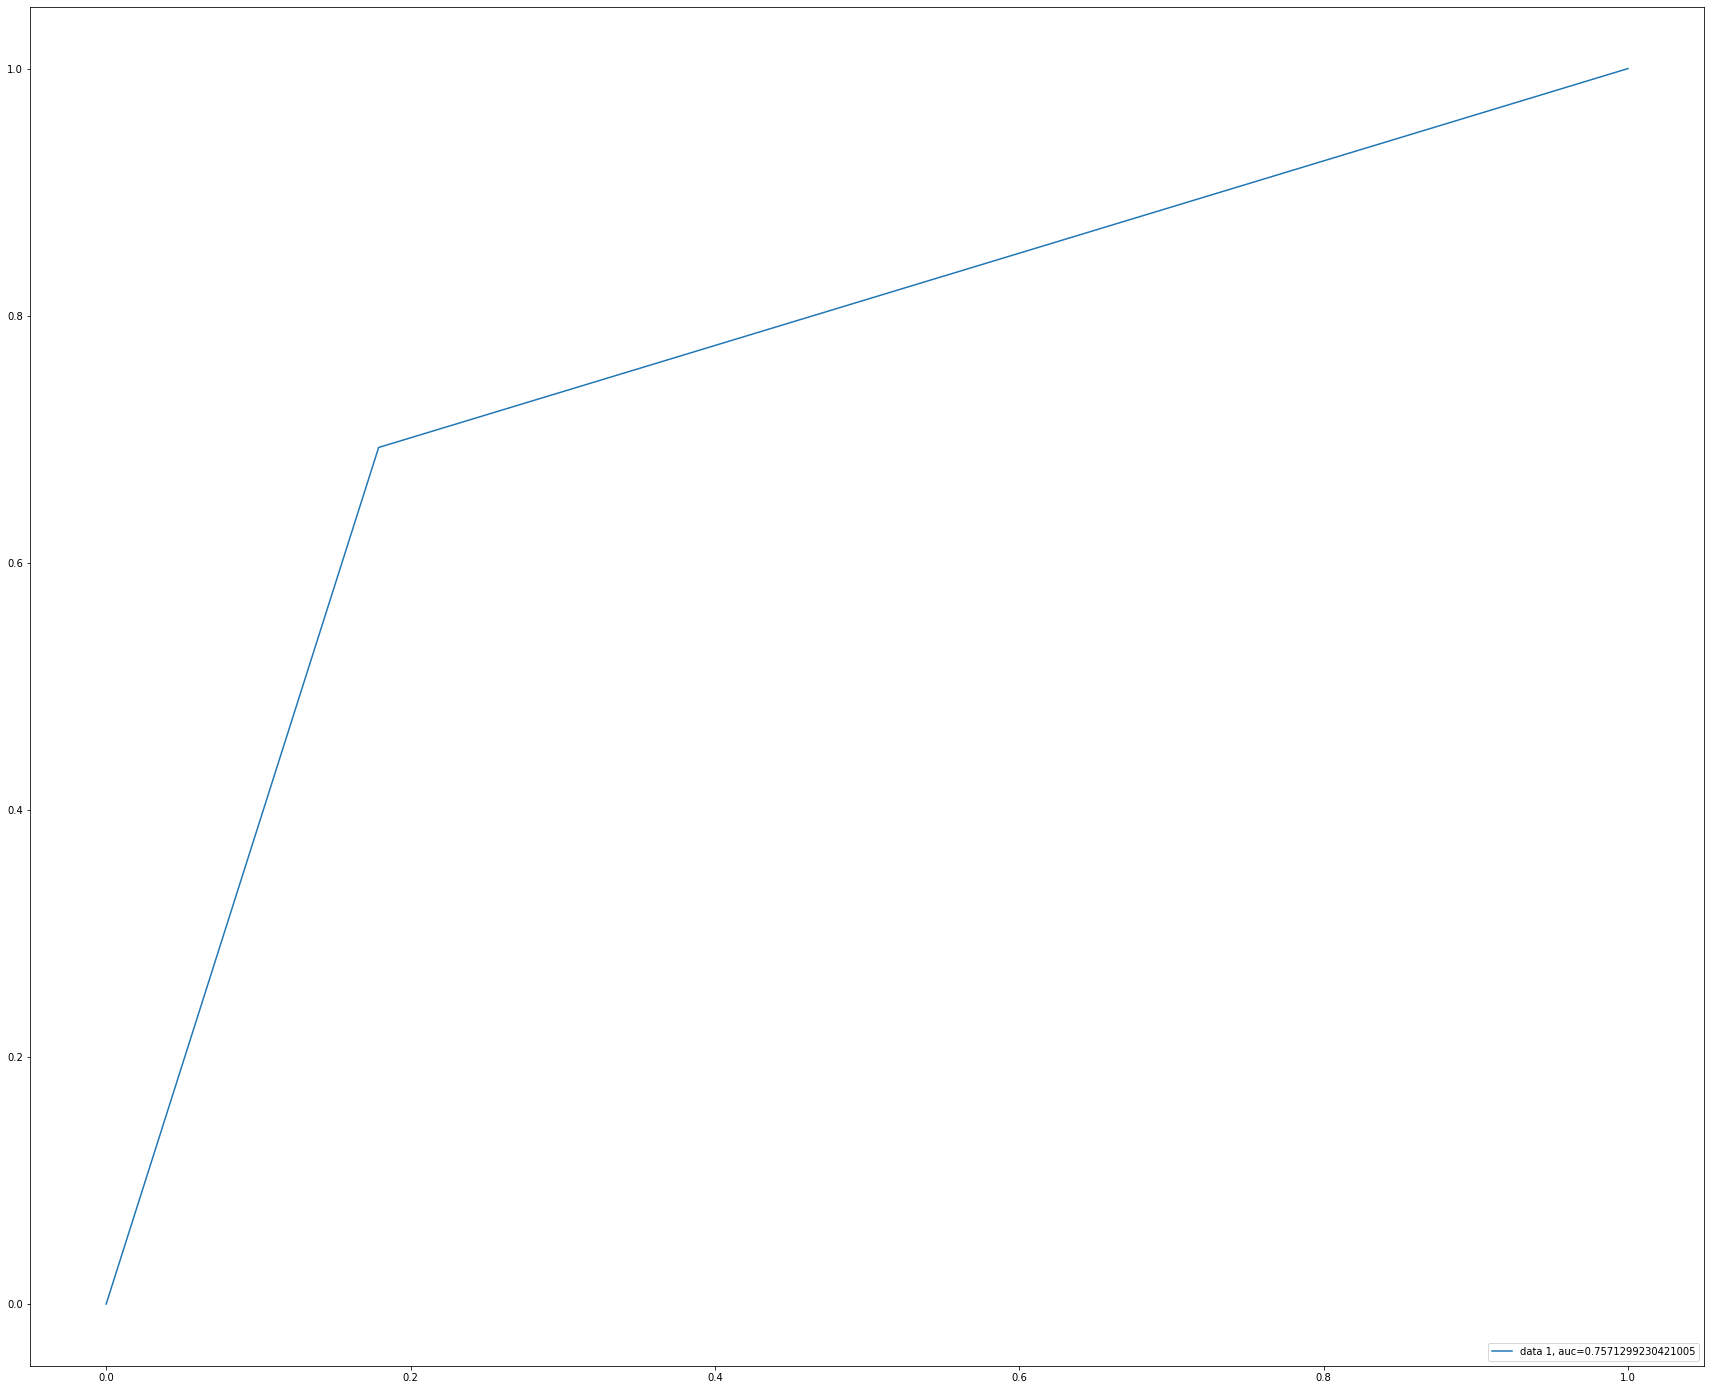

In [55]:
model2(Nearmiss_train, Nearmiss_test,clf, "LogisticRegression", ['Logistic Regression', 'Nearmiss', 'Randomsearch','dropped_col 0', 'MonthBookingDate_1','Handicap','Alcoholism', 'Diabetes', 'MonthBookingDate_1','MonthAppointmentDate_1',  'MonthBookingDate_2'])

{'cv': 5, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': 0, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.01, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(random_state=0, tol=0.01), 'iid': 'deprecated', 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B397ADAA08>, 'penalty': ['l2', 'l1', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'pre_dispatch': '2*n_jobs', 'random_state': 0, 'refit': True, 'return_train_score': False, 'scoring': 'f1', 'verbose': 1}
['MonthAppointmentDate_0', 'AppointmentWeekDay_0', 'AppointmentWeekDay_0', 'HourOfDayBooking_0', 'DayAppointment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.5s finished
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\

[1 0 0 ... 0 0 1]
Accuracy: 62.32%
 f1  0.5818216475521809 
 recall 0.5243057543658746 
 precision 0.6535112760491008


NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/DataWorkshop-Foundation/Predicting-cancellation-of-visit/e/PCV-127
Confusion matrix:
 [[12610  4855]
 [ 8308  9157]]


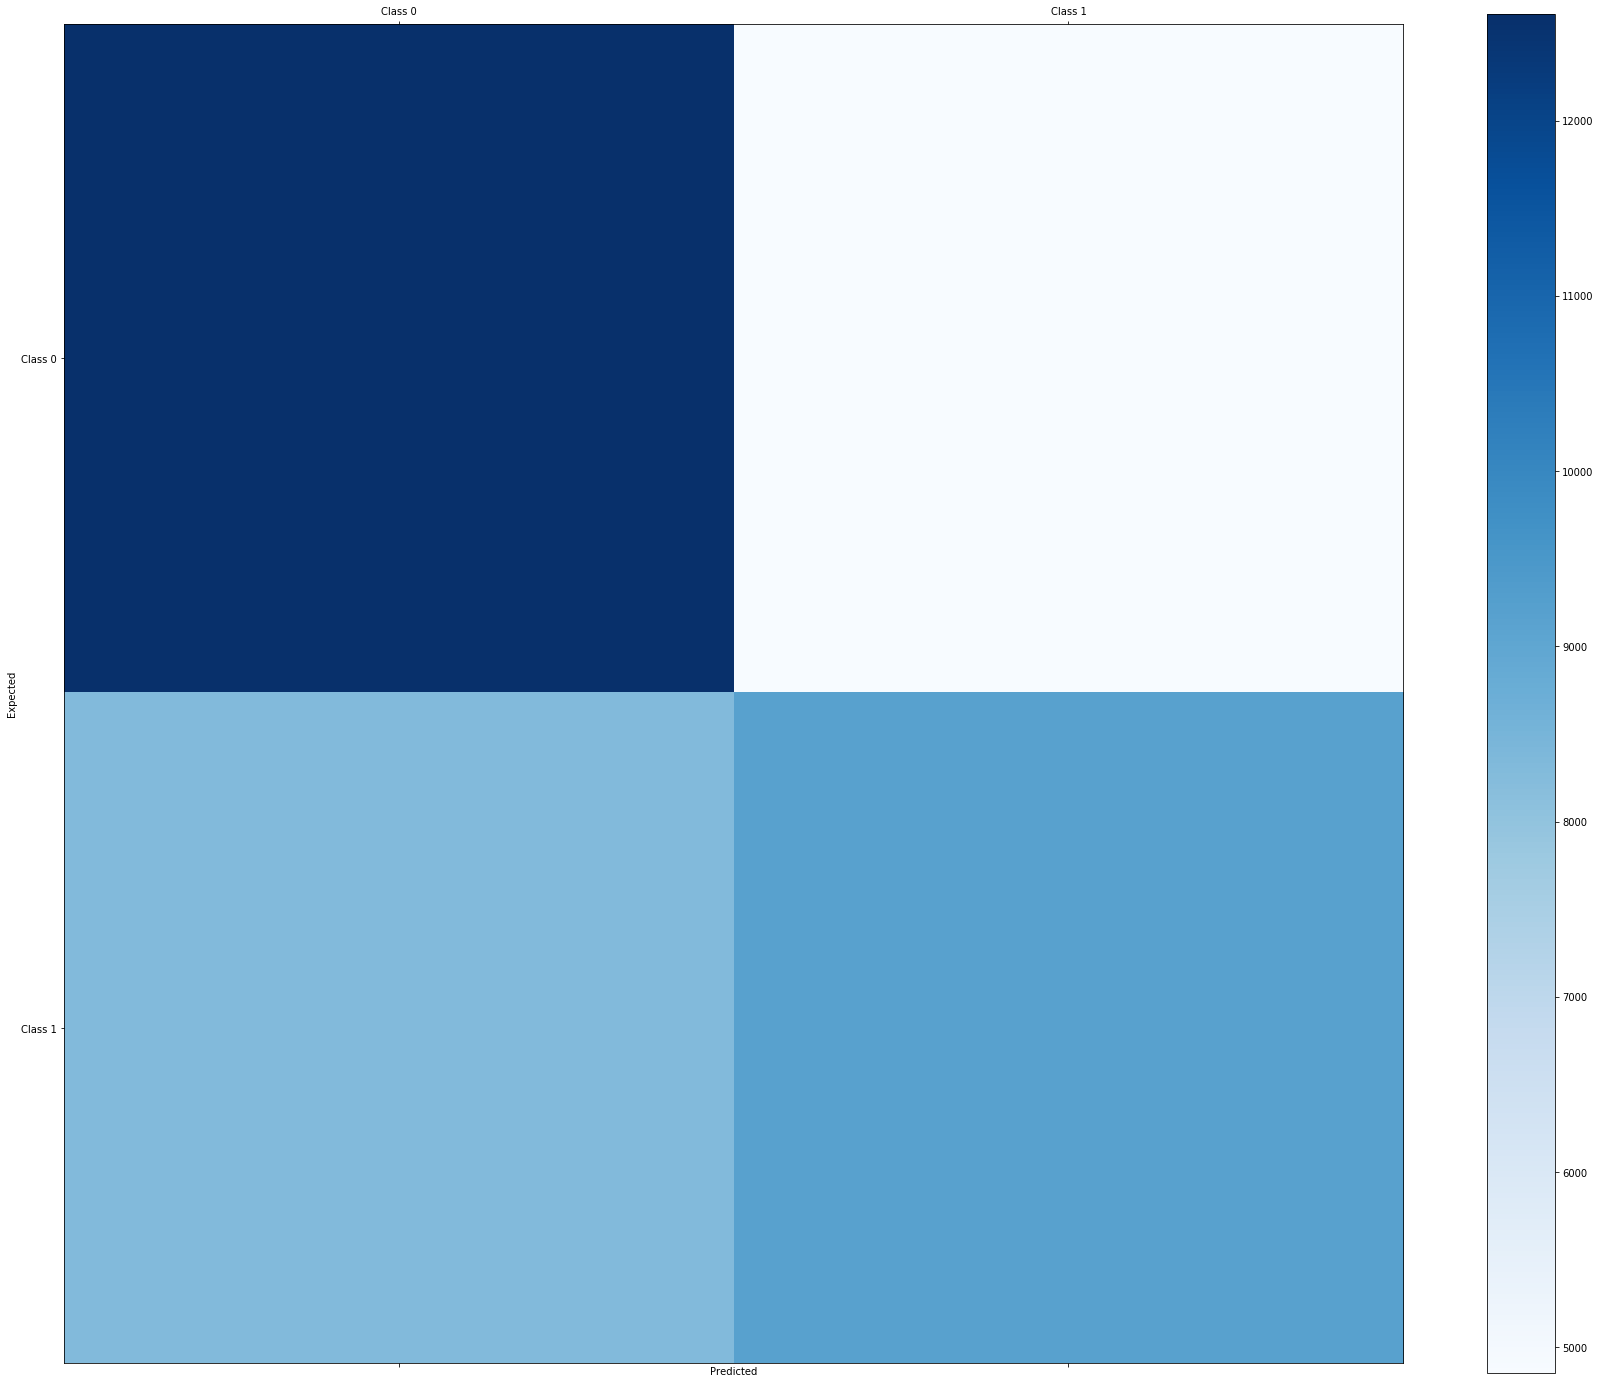

[0.         0.27798454 1.        ] [0.         0.52430575 1.        ] [2 1 0]


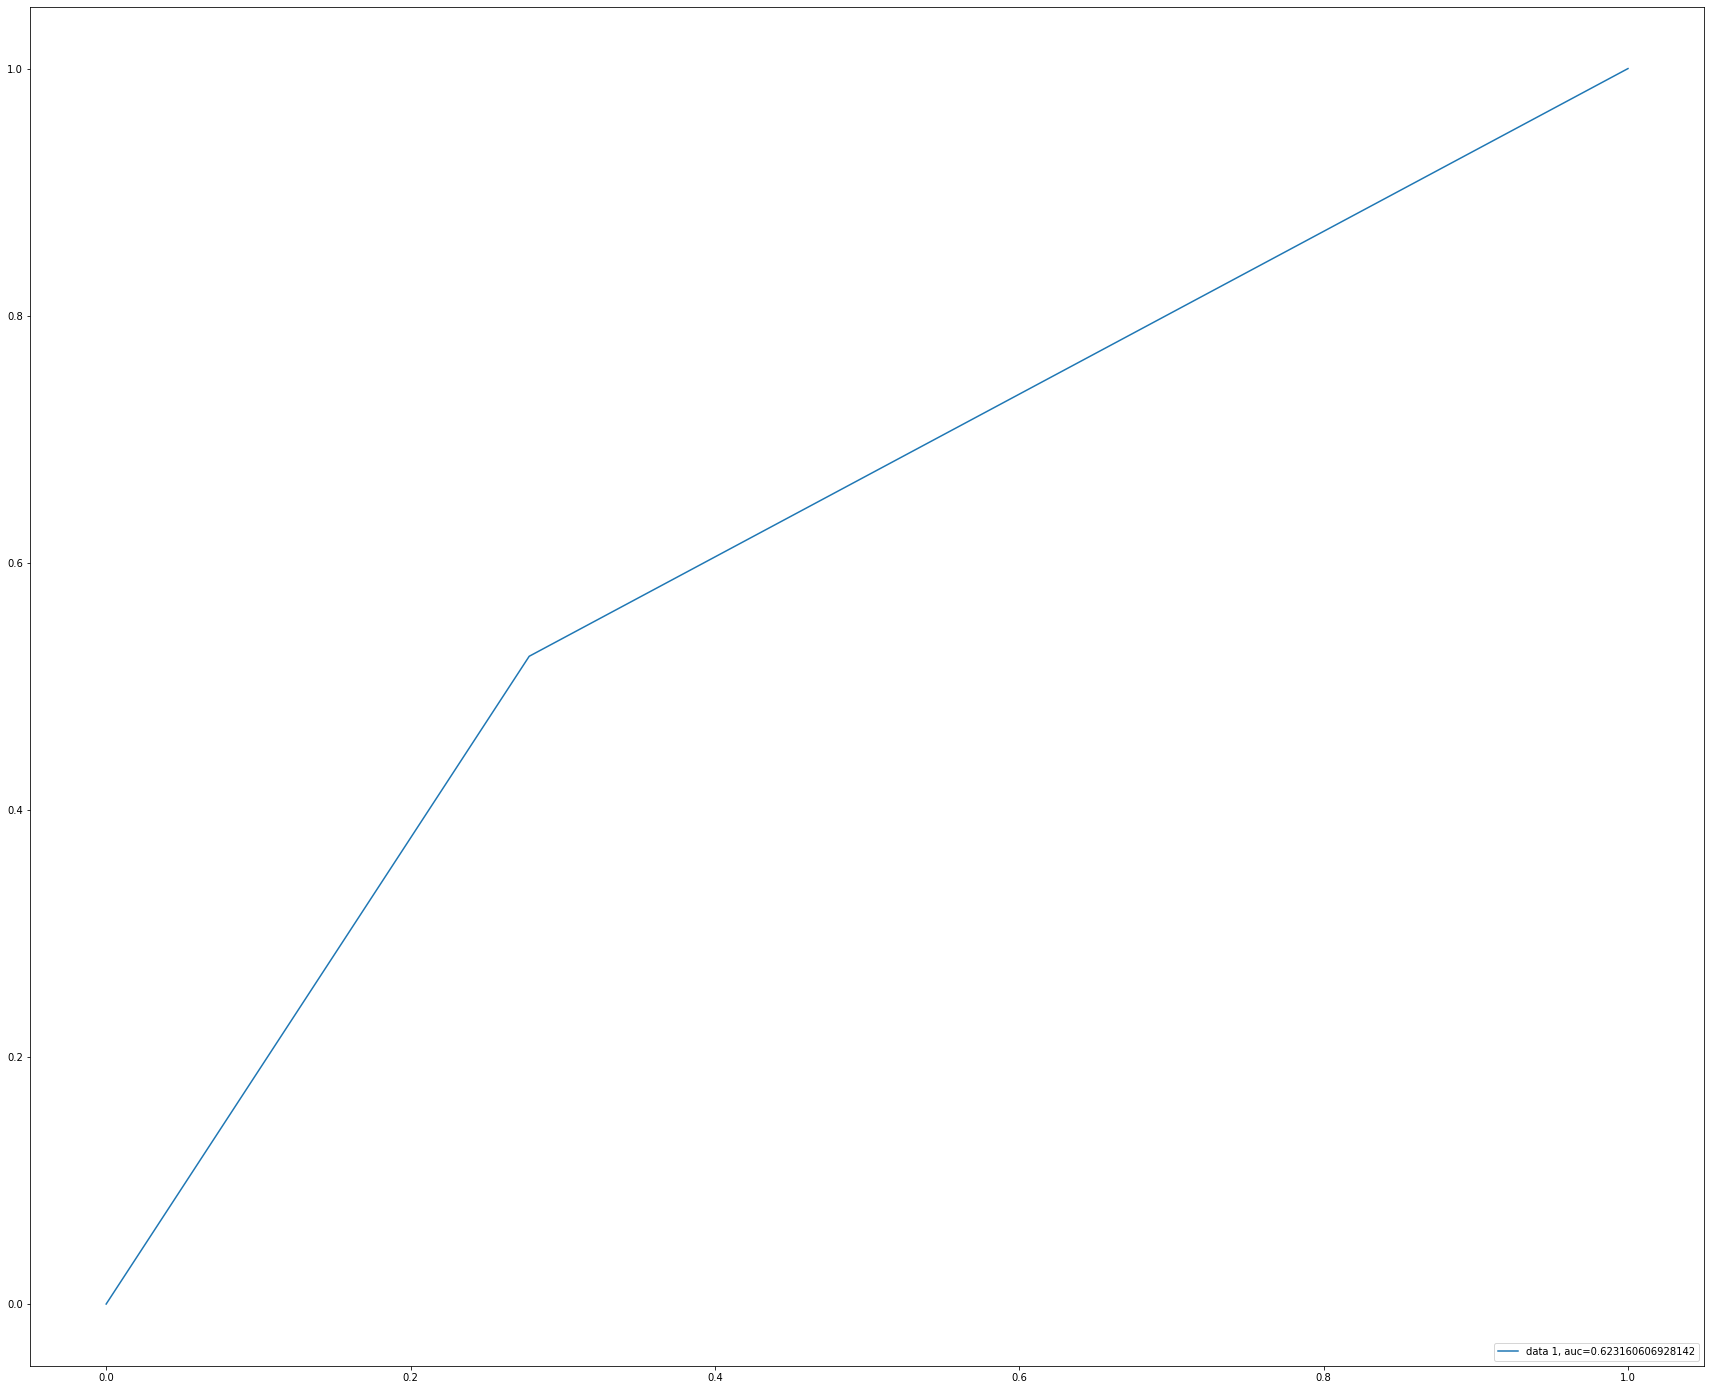

In [56]:
model2(ROS_train, ROS_test,clf, "LogisticRegression", ['Logistic Regression', 'ROS', 'Randomsearch','dropped_col 0', 'MonthBookingDate_1','Handicap','Alcoholism', 'Diabetes', 'MonthBookingDate_1','MonthAppointmentDate_1',  'MonthBookingDate_2'])

{'cv': 5, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': 0, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.01, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(random_state=0, tol=0.01), 'iid': 'deprecated', 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B397ADAA08>, 'penalty': ['l2', 'l1', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'pre_dispatch': '2*n_jobs', 'random_state': 0, 'refit': True, 'return_train_score': False, 'scoring': 'f1', 'verbose': 1}
['MonthAppointmentDate_0', 'AppointmentWeekDay_0', 'AppointmentWeekDay_0', 'HourOfDayBooking_0', 'DayAppointment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\

[1 1 0 ... 0 0 1]
Accuracy: 62.23%
 f1  0.5815673981191223 
 recall 0.5248981439565414 
 precision 0.6519538937306719
https://ui.neptune.ai/DataWorkshop-Foundation/Predicting-cancellation-of-visit/e/PCV-128
Confusion matrix:
 [[3180 1238]
 [2099 2319]]


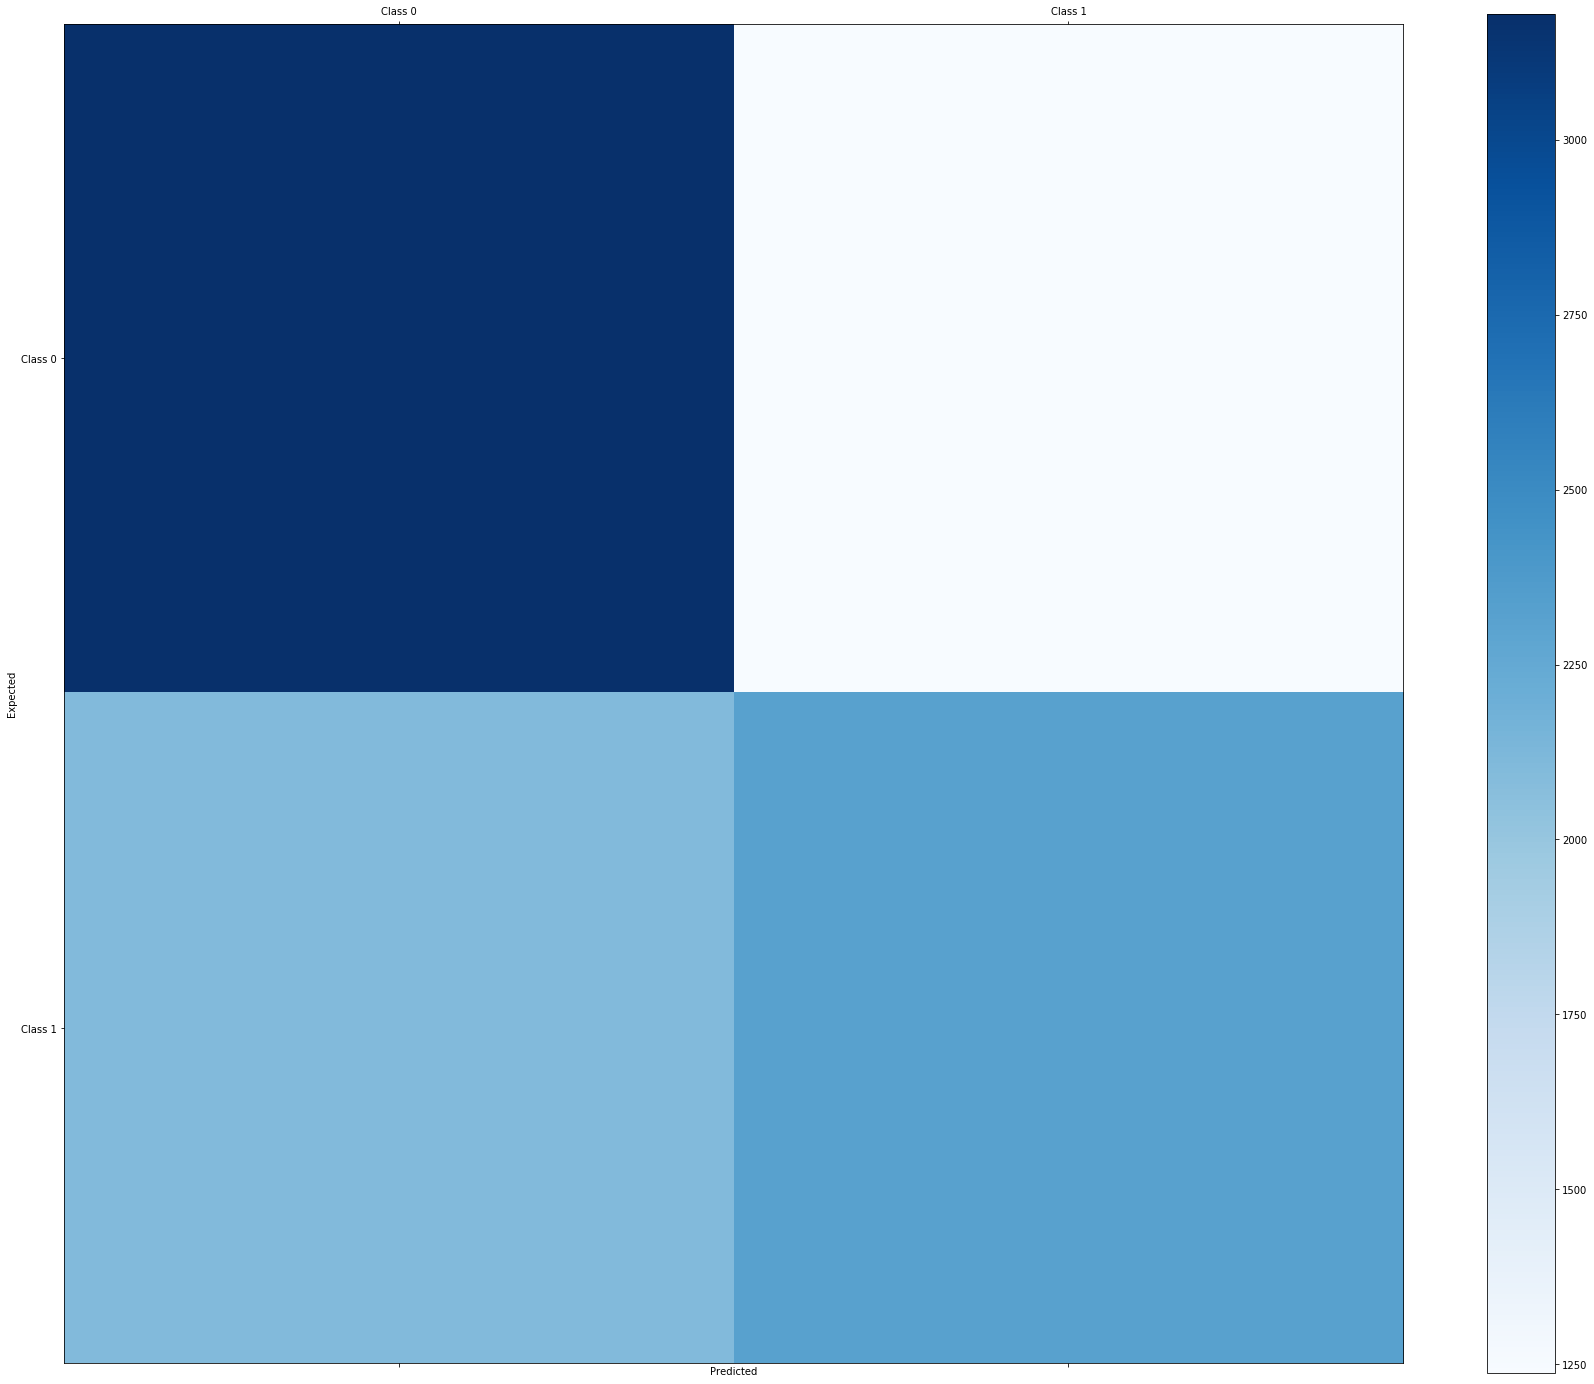

[0.         0.28021729 1.        ] [0.         0.52489814 1.        ] [2 1 0]


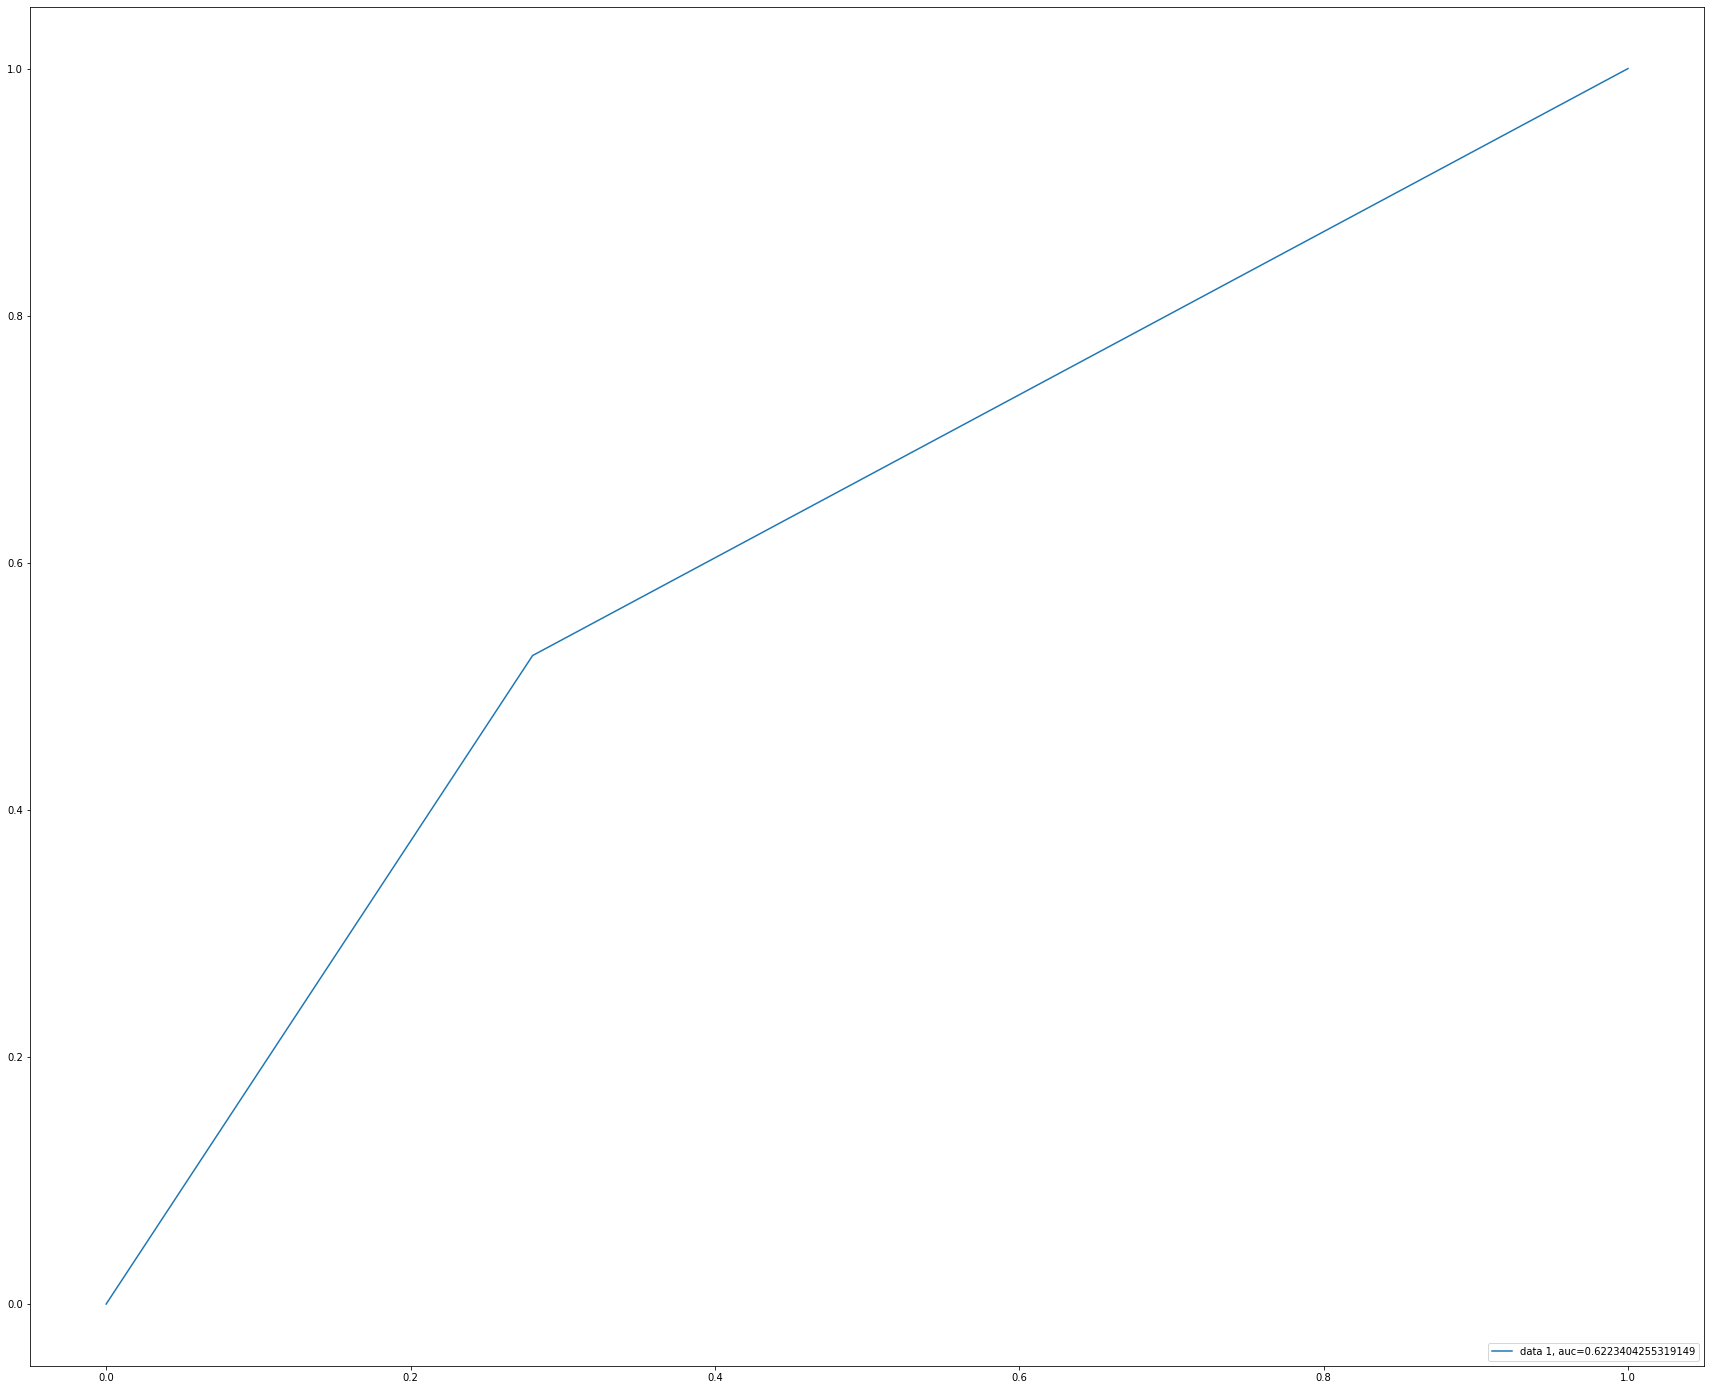

In [57]:
model2(RUS_train, RUS_test, clf, "LogisticRegression", ['Logistic Regression', 'RUS', 'Randomsearch','dropped_col 0','dropped_col 0', 'MonthBookingDate_1','Handicap','Alcoholism', 'Diabetes', 'MonthBookingDate_1','MonthAppointmentDate_1',  'MonthBookingDate_2'])

{'cv': 5, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': 0, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.01, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(random_state=0, tol=0.01), 'iid': 'deprecated', 'n_iter': 10, 'n_jobs': -1, 'param_distributions': {'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001B397ADAA08>, 'penalty': ['l2', 'l1', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'pre_dispatch': '2*n_jobs', 'random_state': 0, 'refit': True, 'return_train_score': False, 'scoring': 'f1', 'verbose': 1}
['MonthAppointmentDate_0', 'AppointmentWeekDay_0', 'AppointmentWeekDay_0', 'HourOfDayBooking_0', 'DayAppointment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.9s finished
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\domin\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\

[1 0 0 ... 1 0 0]
Accuracy: 63.31%
 f1  0.5915063640482761 
 recall 0.5312222551050607 
 precision 0.6672242356658303
https://ui.neptune.ai/DataWorkshop-Foundation/Predicting-cancellation-of-visit/e/PCV-129
Confusion matrix:
 [[9935 3581]
 [6336 7180]]


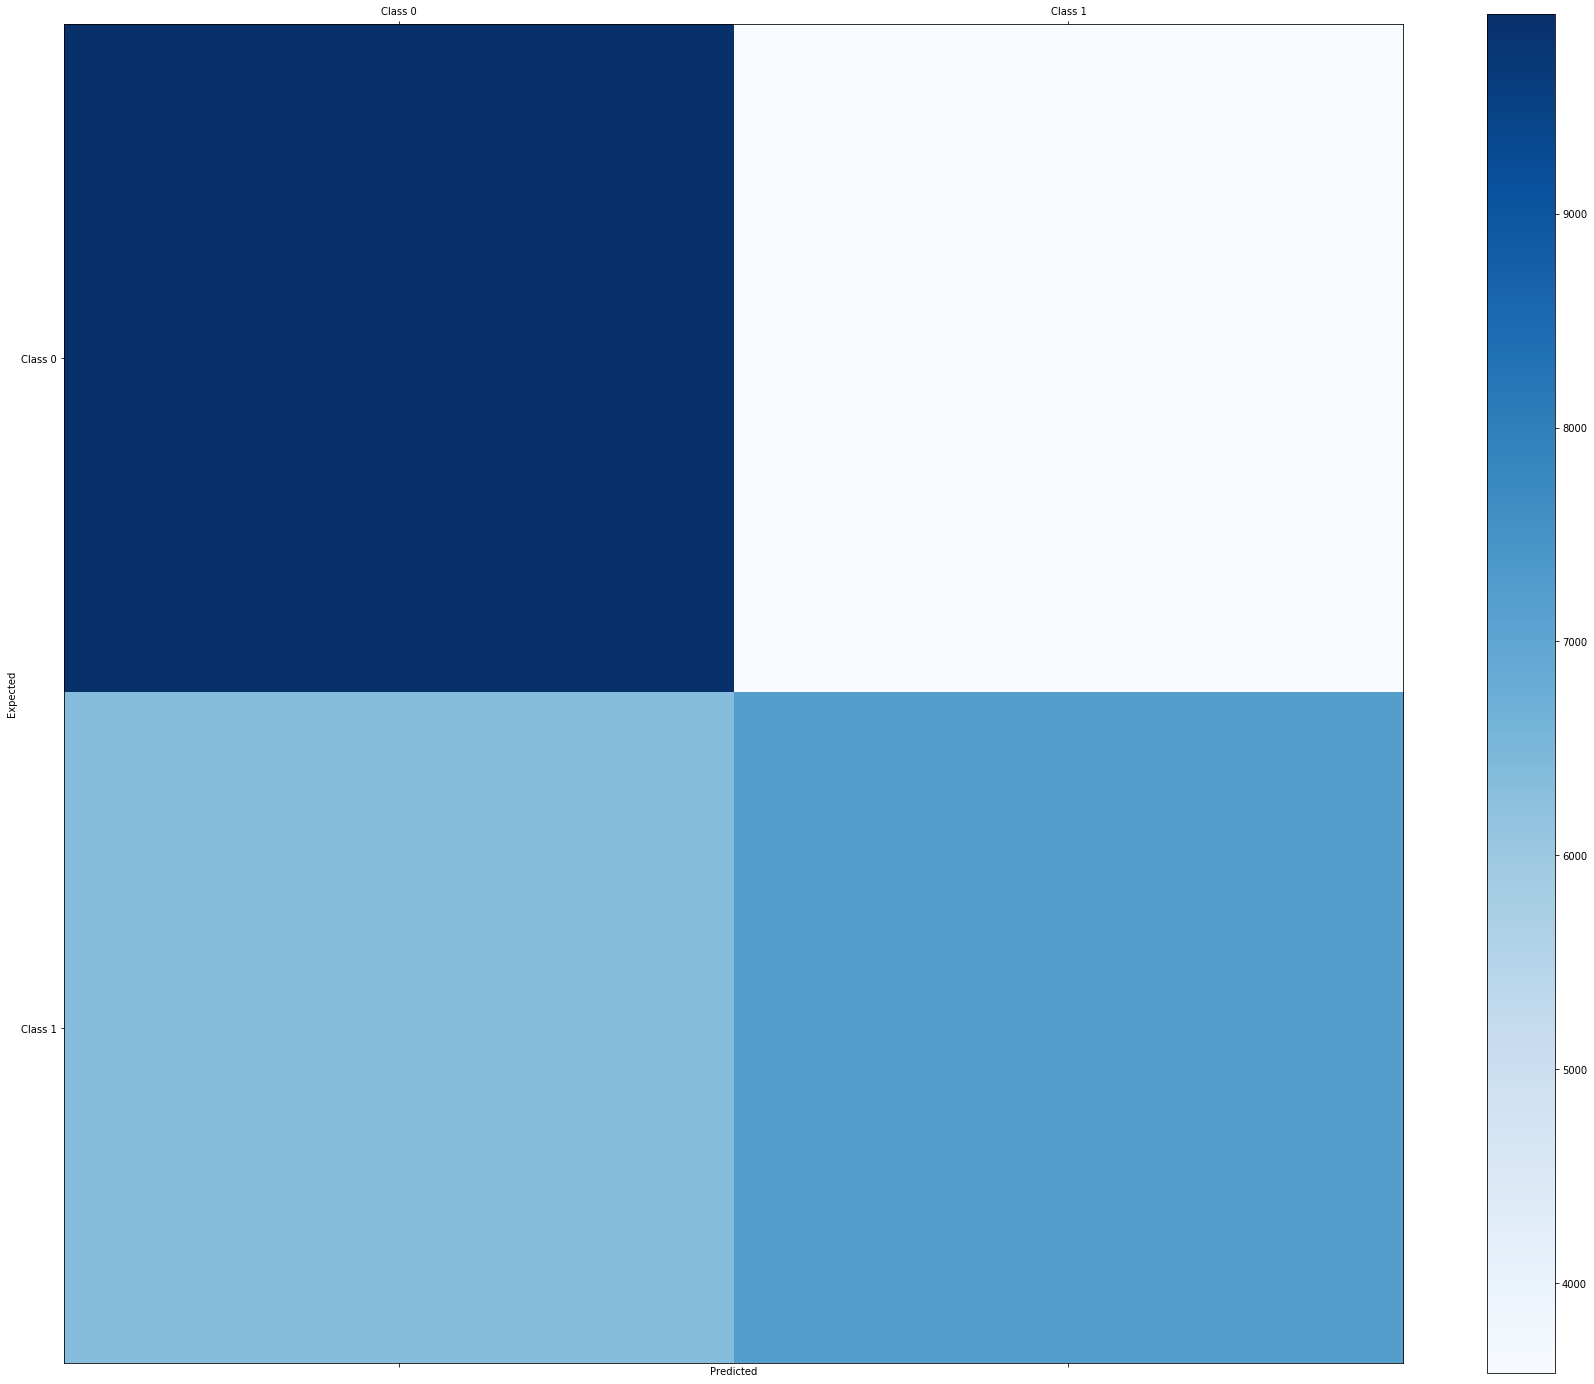

[0.         0.26494525 1.        ] [0.         0.53122226 1.        ] [2 1 0]


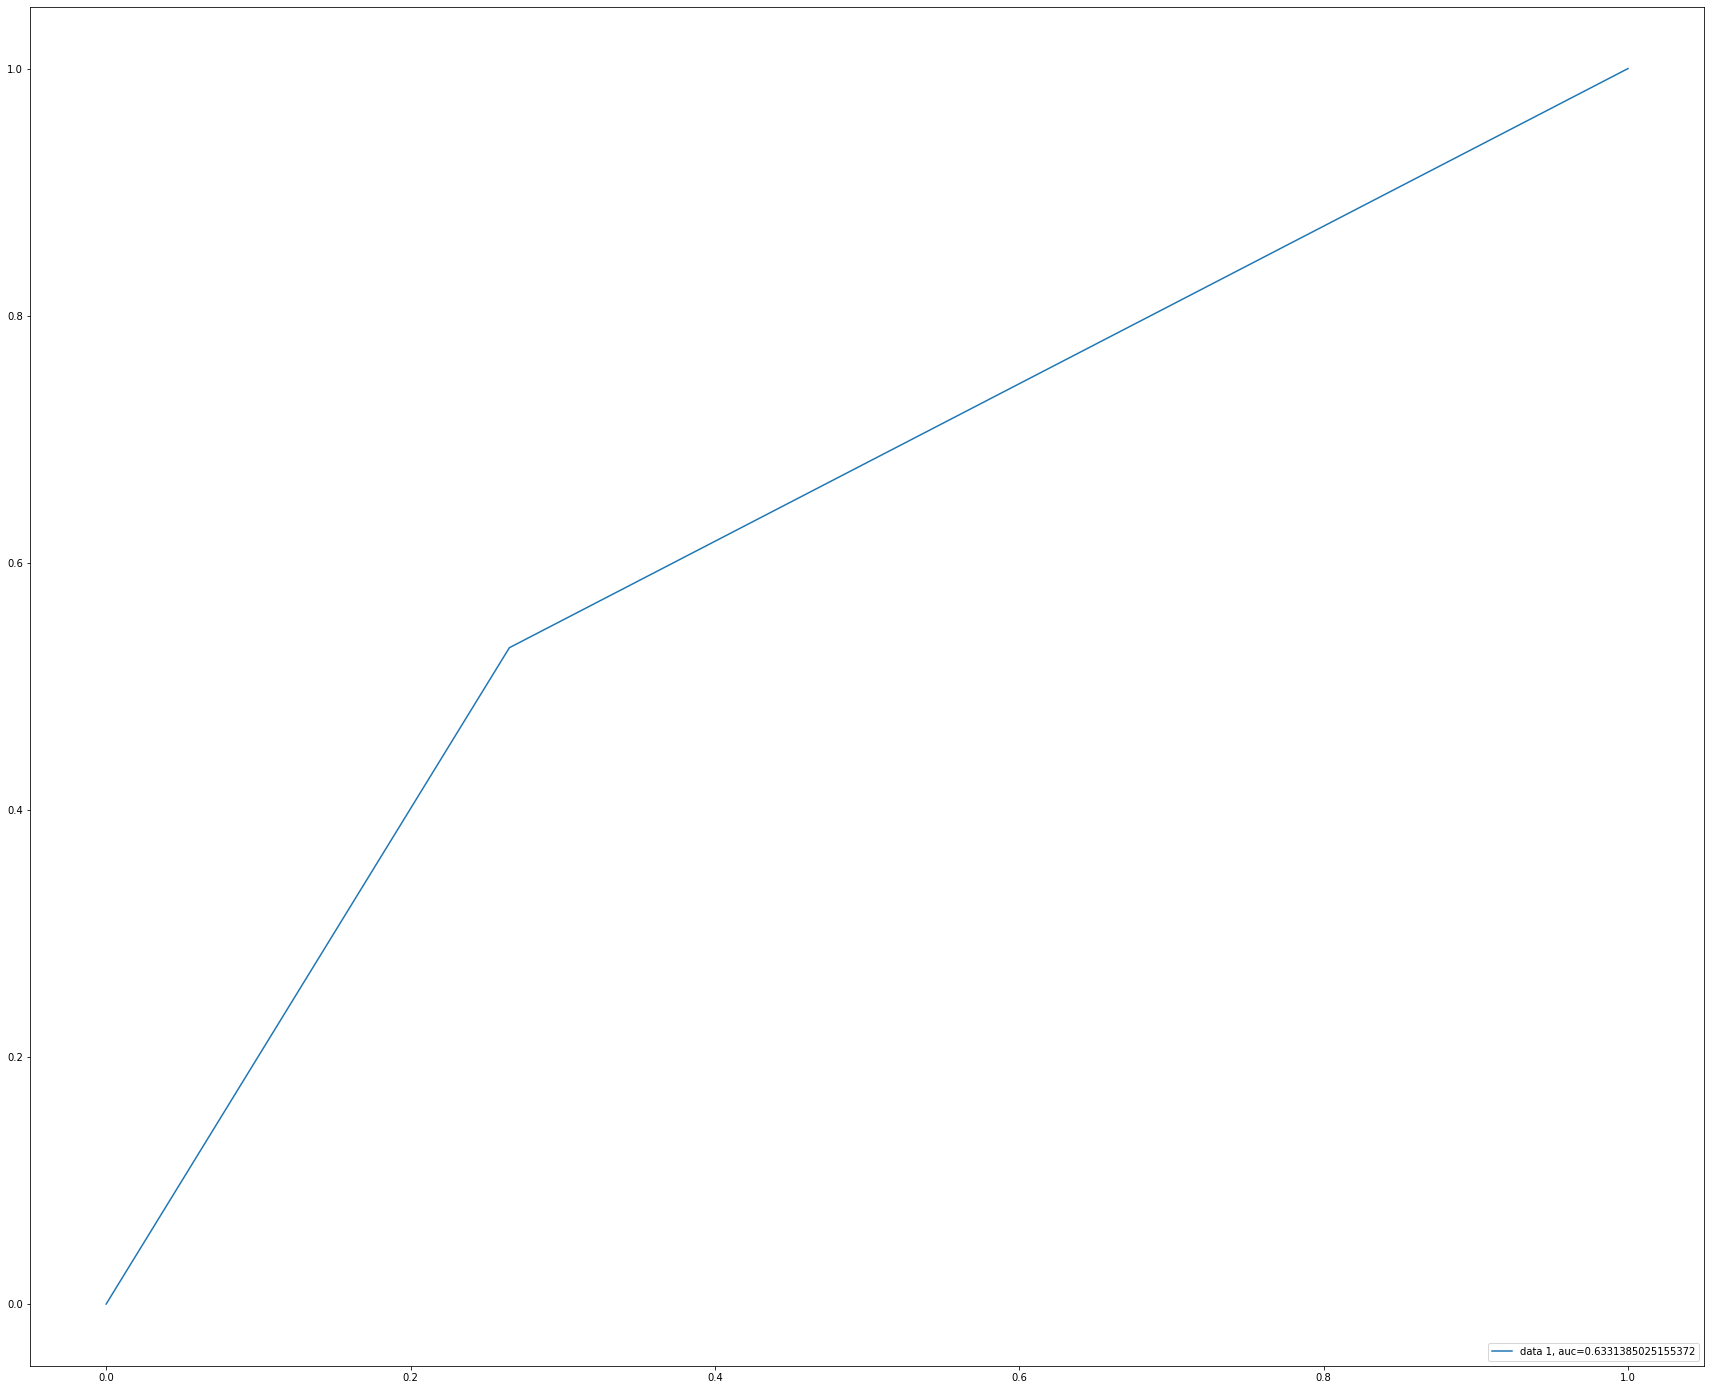

In [58]:
model2(SMOTETomek_train, SMOTETomek_test, clf, "LogisticRegression", ['Logistic Regression', 'SMOTETomek', 'Randomsearch', 'dropped_col 0', 'MonthBookingDate_1','Handicap','Alcoholism', 'Diabetes', 'MonthBookingDate_1','MonthAppointmentDate_1',  'MonthBookingDate_2'])

In [66]:
################################33##########











In [59]:
param_grid = dict(  penalty=['l2', 'l1', 'elasticnet'],
                    solver=['newton-cg', 'lbfgs', 'liblinear'], 
 )



In [60]:
grid = GridSearchCV(estimator=logistic, param_grid=param_grid, scoring='f1', verbose=1, n_jobs=-1)

{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': 0, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.01, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(random_state=0, tol=0.01), 'iid': 'deprecated', 'n_jobs': -1, 'param_grid': {'penalty': ['l2', 'l1', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': 'f1', 'verbose': 1}
['MonthAppointmentDate_0', 'AppointmentWeekDay_0', 'AppointmentWeekDay_0', 'HourOfDayBooking_0', 'DayAppointmentDate_0', 'MonthBookingDate_0', 'Neighbourhood_0', 'DayBookingDate_0', 'MonthBookingDate_1', 'Handicap', 'Alcoholism', 'D

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  6.7min finished
C:\Users\domin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0 0 0 ... 0 0 0]
Accuracy: 79.51%
 f1  0.027759705053133805 
 recall 0.014486192847442281 
 precision 0.3316062176165803


NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/DataWorkshop-Foundation/Predicting-cancellation-of-visit/e/PCV-130
Confusion matrix:
 [[17336   129]
 [ 4354    64]]


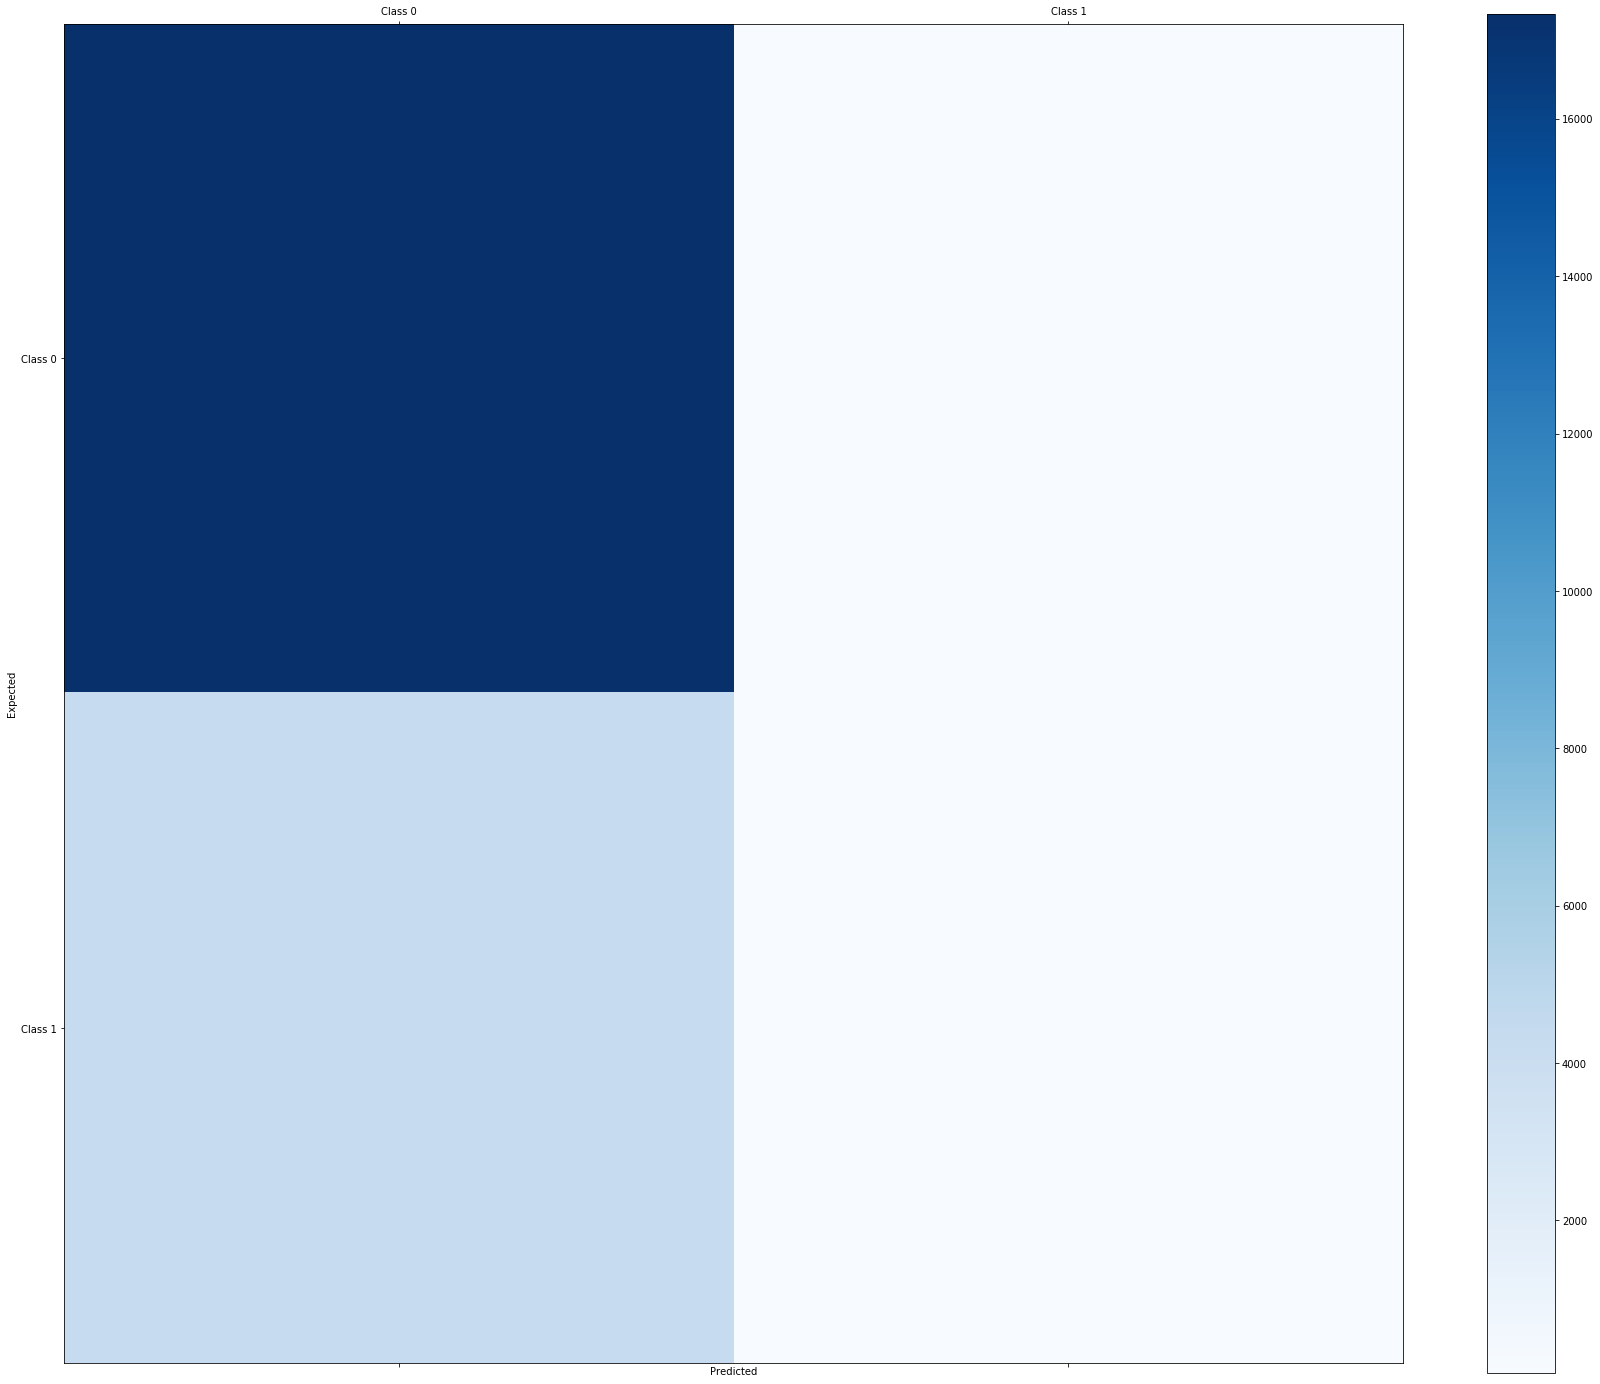

[0.        0.0073862 1.       ] [0.         0.01448619 1.        ] [2 1 0]


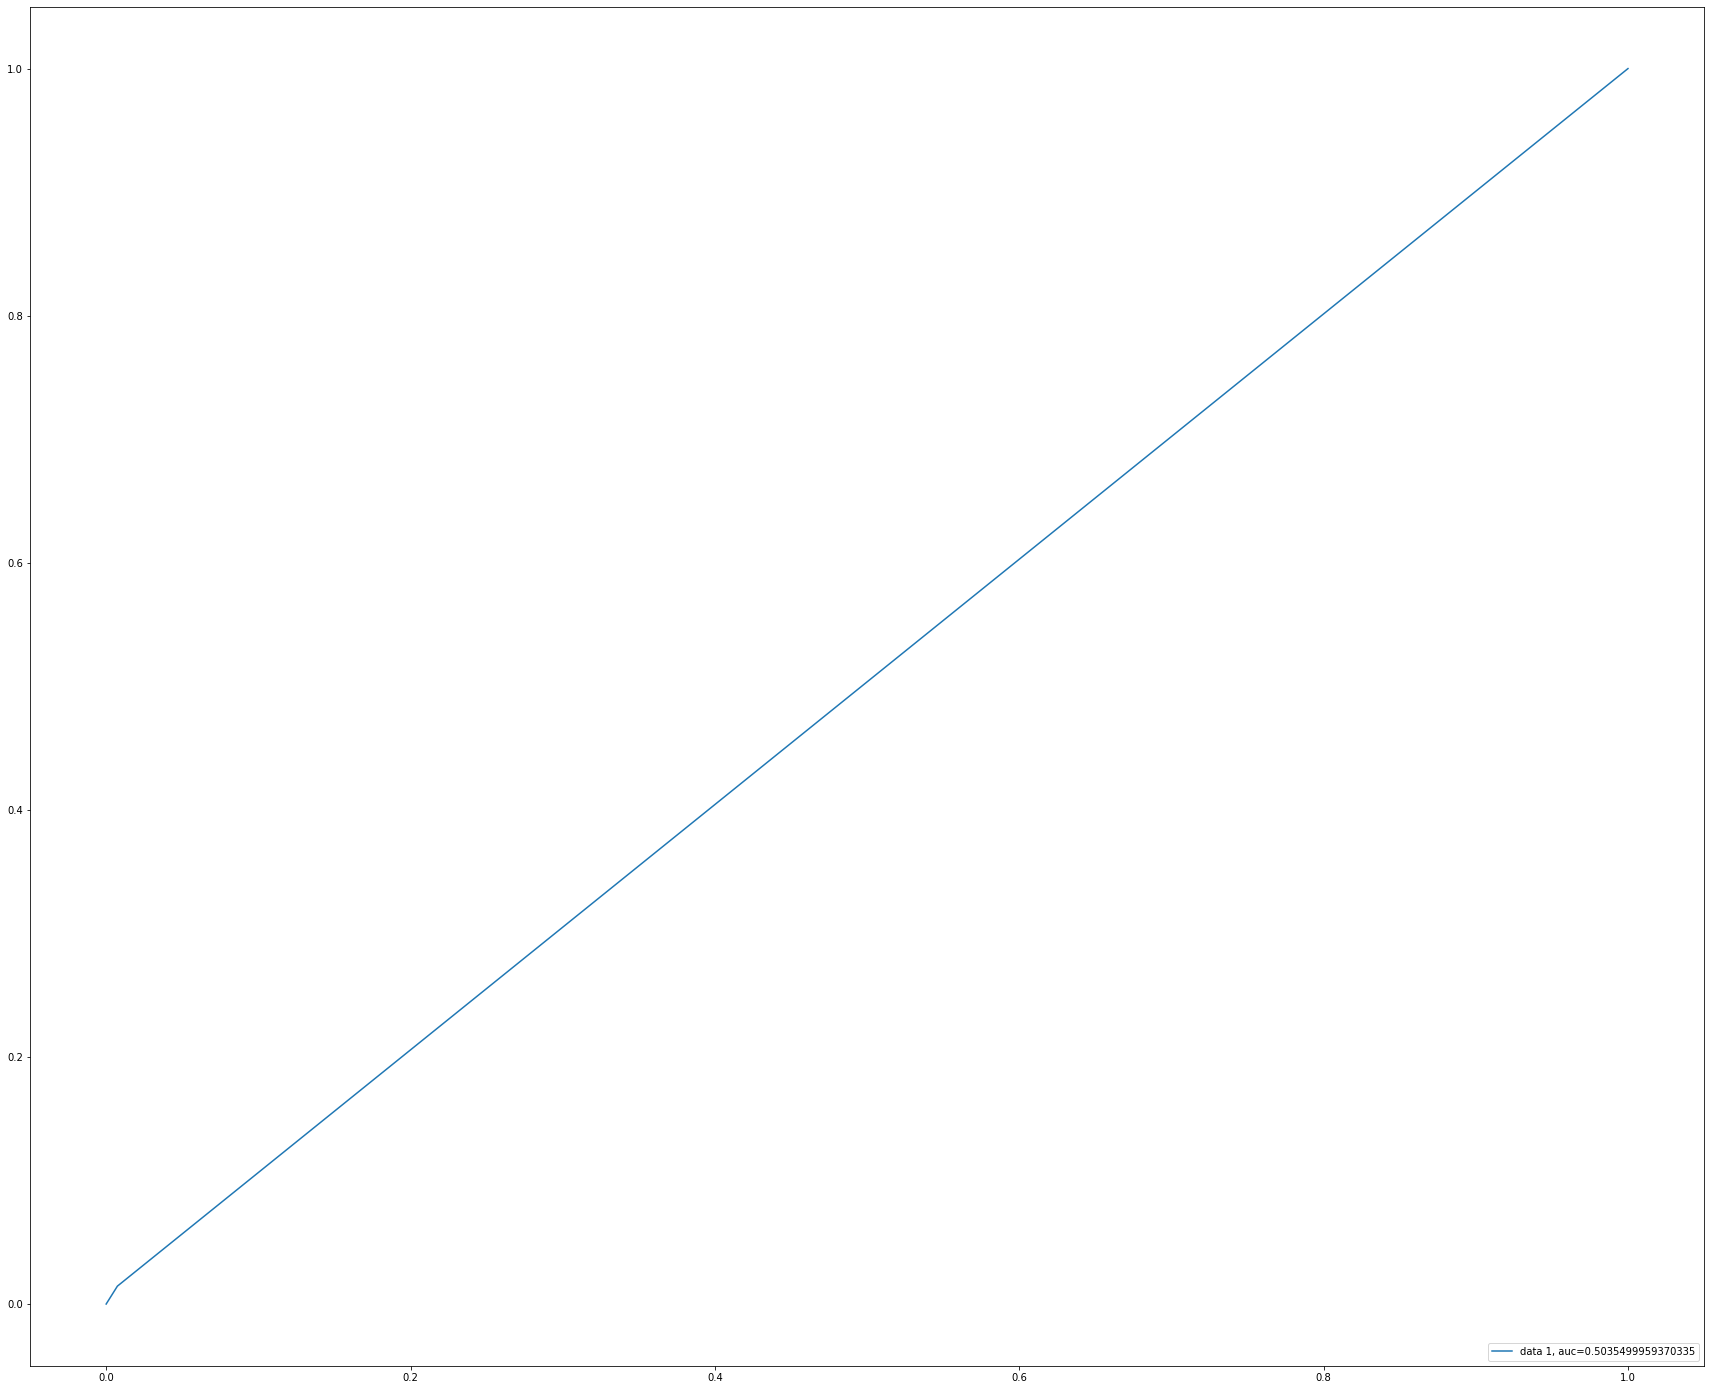

In [62]:
model2(raw_train, raw_test, grid, "LogisticRegression", ['Logistic Regression', 'Raw', 'GridSearch', 'dropped_col 0','MonthBookingDate_1','Handicap','Alcoholism', 'Diabetes', 'MonthBookingDate_1','MonthAppointmentDate_1',  'MonthBookingDate_2'])

{'cv': None, 'error_score': nan, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 100, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': 0, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.01, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(random_state=0, tol=0.01), 'iid': 'deprecated', 'n_jobs': -1, 'param_grid': {'penalty': ['l2', 'l1', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear']}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': False, 'scoring': 'f1', 'verbose': 1}
['MonthAppointmentDate_0', 'AppointmentWeekDay_0', 'AppointmentWeekDay_0', 'HourOfDayBooking_0', 'DayAppointmentDate_0', 'MonthBookingDate_0', 'Neighbourhood_0', 'DayBookingDate_0', 'MonthBookingDate_1', 'Handicap', 'Alcoholism', 'D

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed: 24.3min finished
C:\Users\domin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[1 0 0 ... 1 1 1]
Accuracy: 81.08%
 f1  0.8046228422794987 
 recall 0.7790178571428571 
 precision 0.8319682151589242


NVMLError: NVML Shared Library Not Found - GPU usage metrics may not be reported.


https://ui.neptune.ai/DataWorkshop-Foundation/Predicting-cancellation-of-visit/e/PCV-131
Confusion matrix:
 [[14716  2749]
 [ 3861 13611]]


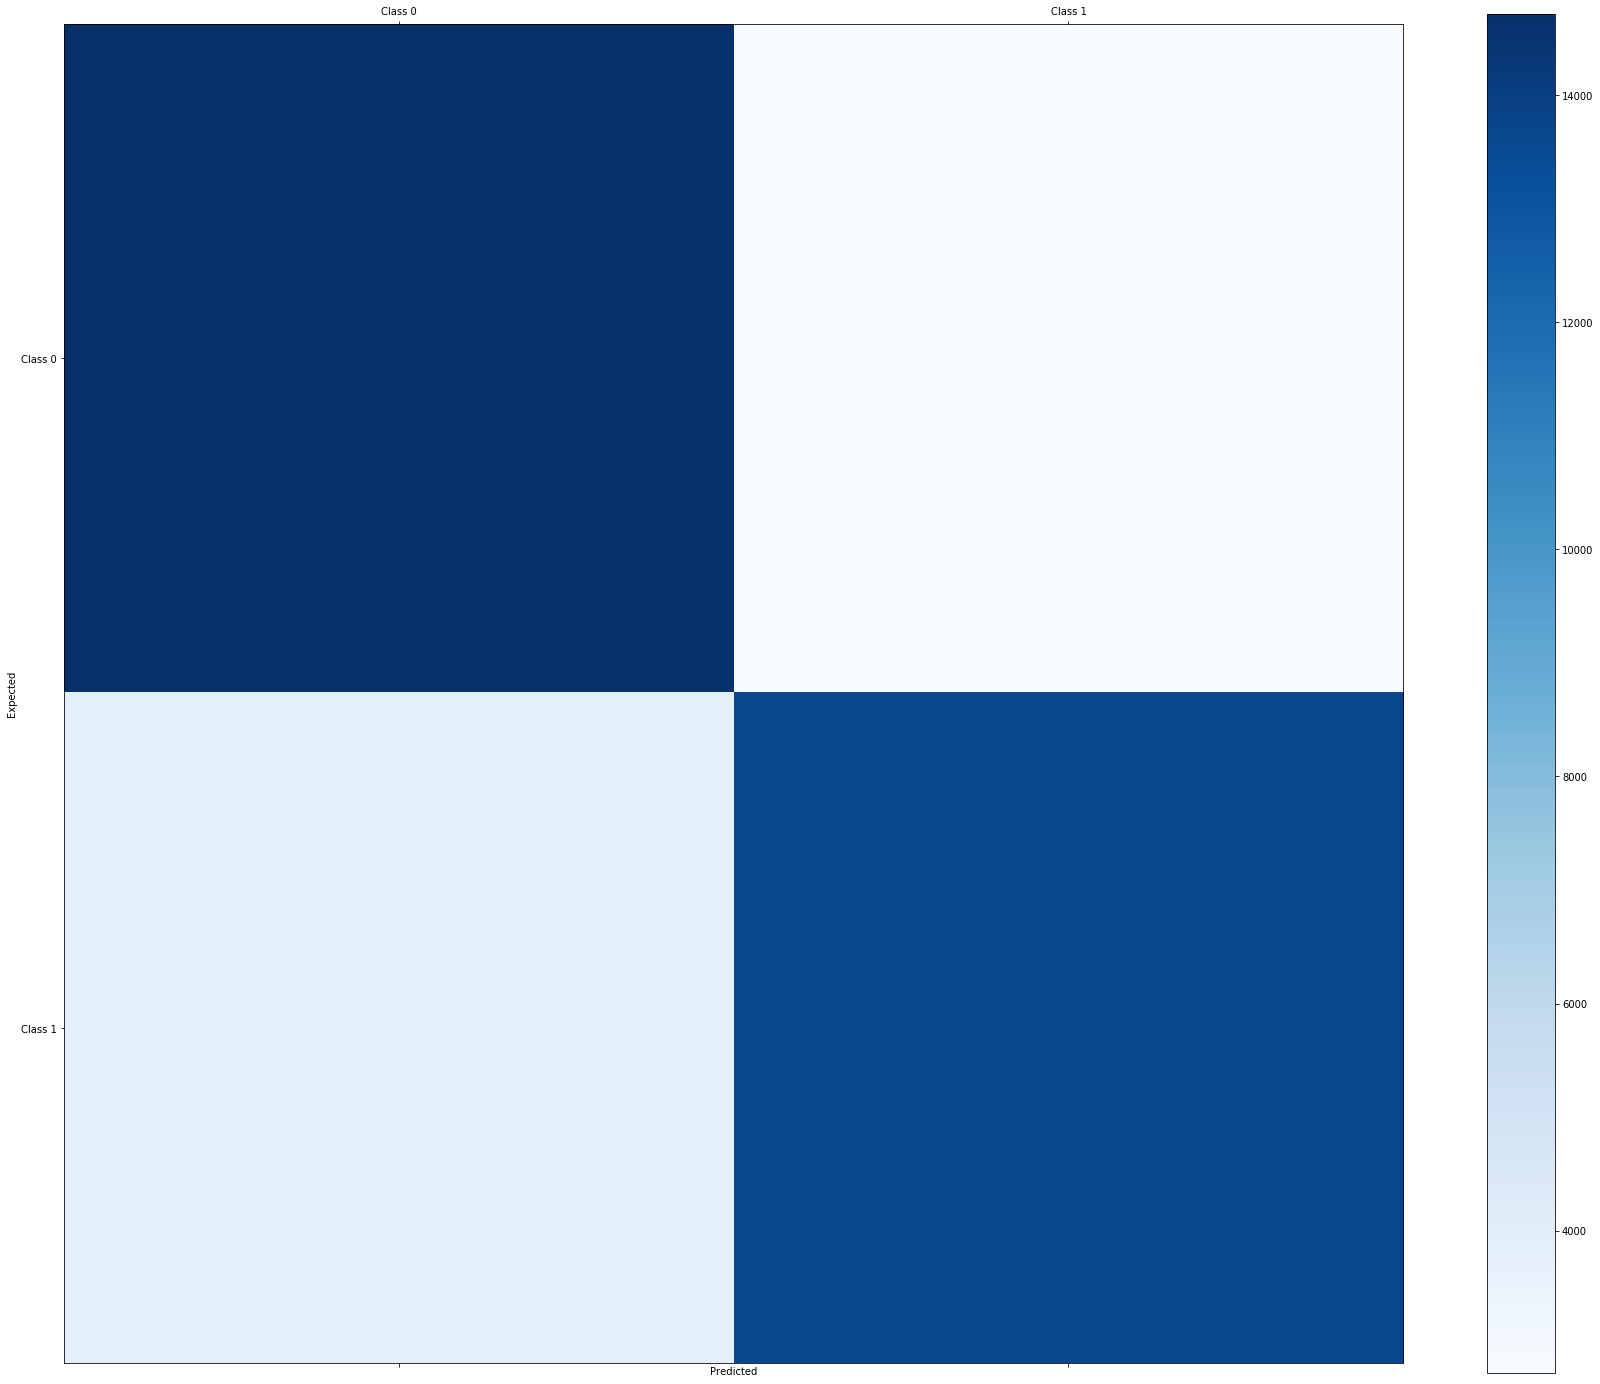

[0.         0.15740052 1.        ] [0.         0.77901786 1.        ] [2 1 0]


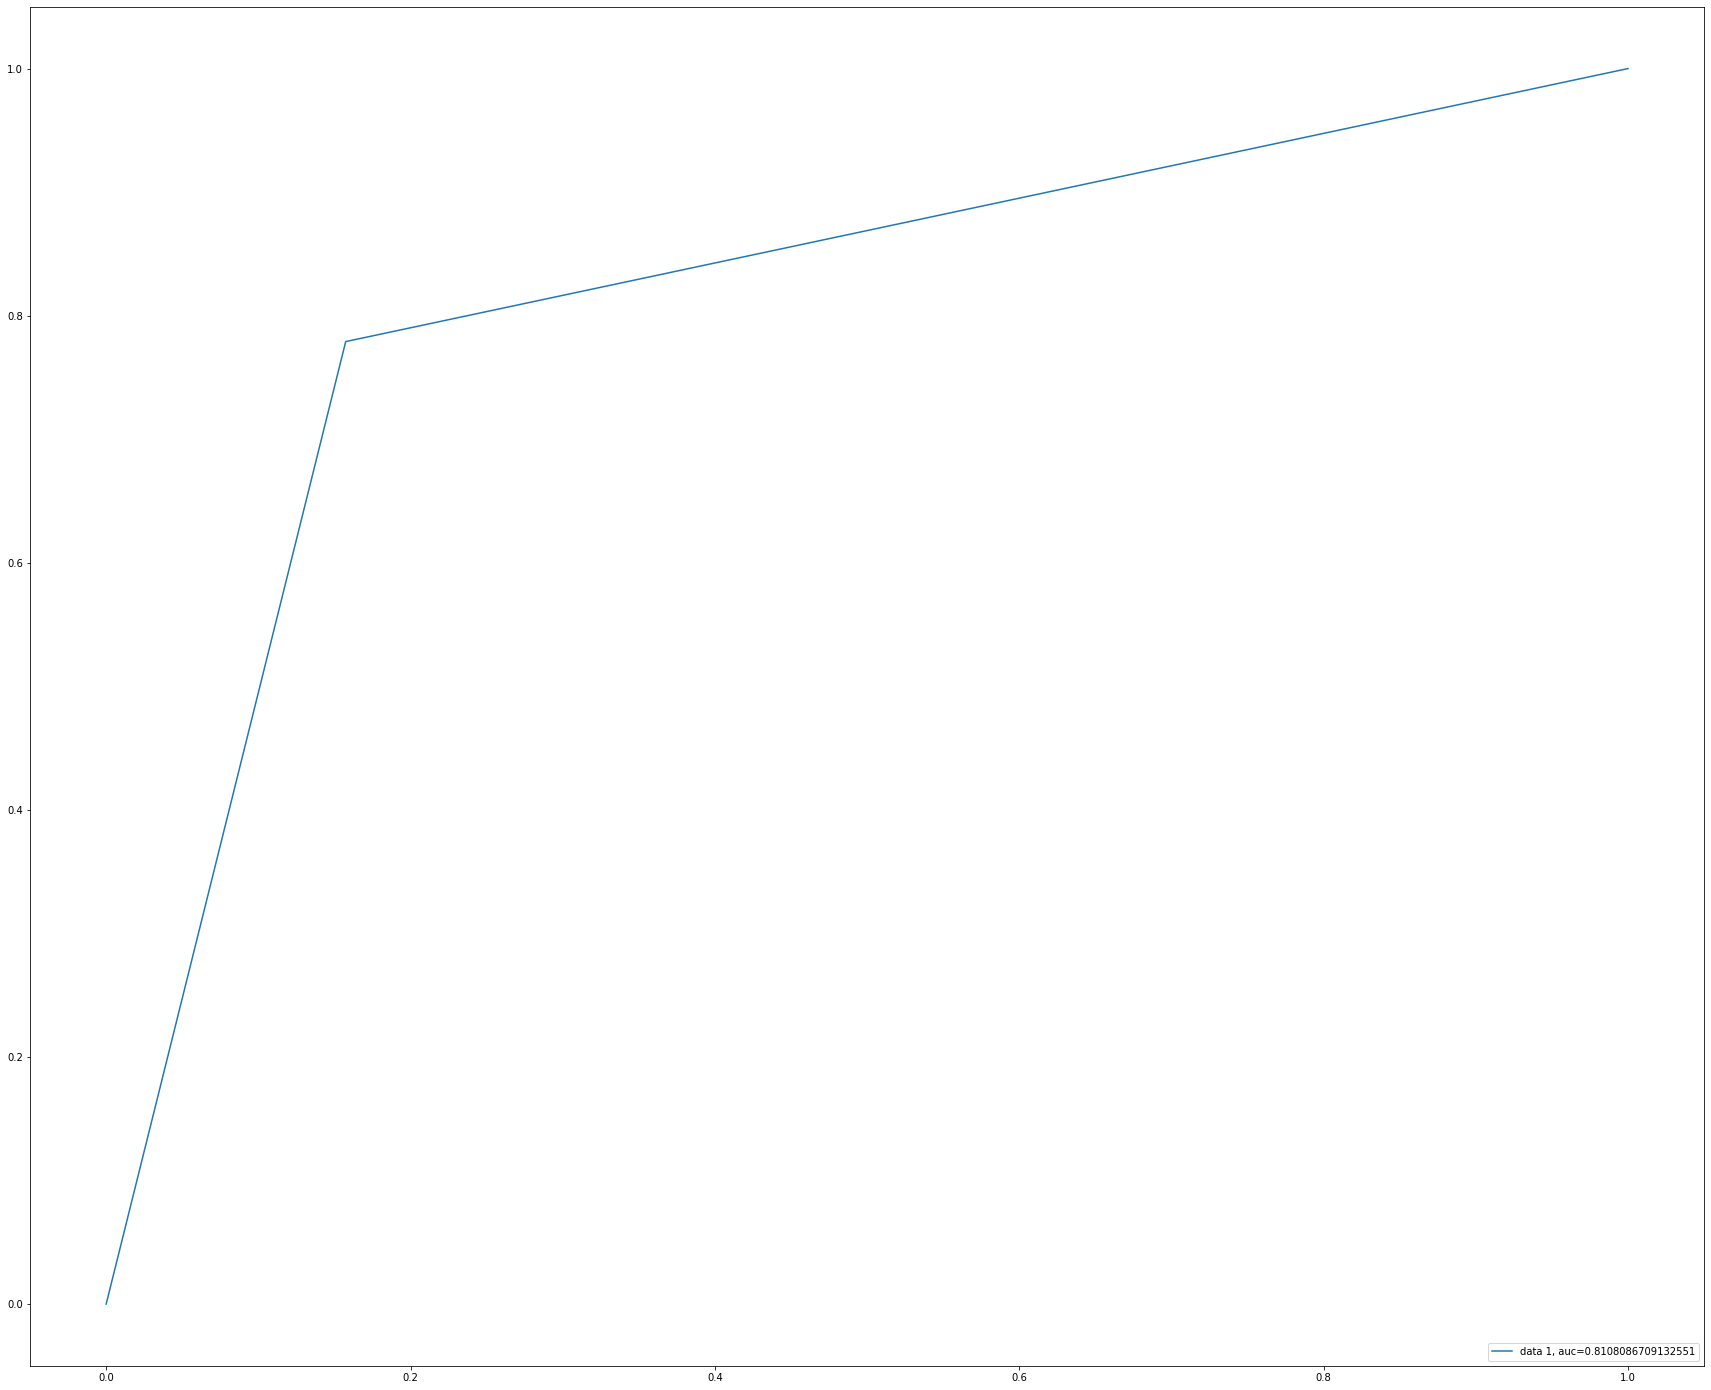

In [65]:
model2(Adasyn_train, Adasyn_test, grid, "LogisticRegression", ['Logistic Regression', 'Adasyn', 'GridSearch', 'dropped_col 0','MonthBookingDate_1','Handicap','Alcoholism', 'Diabetes', 'MonthBookingDate_1','MonthAppointmentDate_1',  'MonthBookingDate_2'])

In [ ]:
model2(Nearmiss_train, Nearmiss_test, grid, "LogisticRegression", ['Logistic Regression', 'Nearmiss', 'GridSearch'])

In [ ]:
model2(ROS_train, ROS_test,grid, "LogisticRegression", ['Logistic Regression', 'ROS', 'GridSearch'])

In [ ]:
model2(RUS_train, RUS_test, grid, "LogisticRegression", ['Logistic Regression', 'RUS', 'GridSearch'])

In [ ]:
model2(SMOTETomek_train, SMOTETomek_test, grid, "LogisticRegression", ['Logistic Regression', 'SmoteTomek', 'GridSearch'])

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
model2(raw_train, raw_test, DummyClassifier(strategy="most_frequent"), "LogisticRegression", ['Logistic Regression', 'Raw', 'DummyClassifier'])

In [ ]:
model2(Adasyn_train, Adasyn_test, DummyClassifier(strategy="most_frequent"), "LogisticRegression", ['Logistic Regression', 'Adasyn', 'DummyClassifier'])

In [ ]:
model2(Nearmiss_train, Nearmiss_test, DummyClassifier(strategy="most_frequent"), "LogisticRegression", ['Logistic Regression', 'Nearmiss', 'DummyClassifier'])

In [ ]:
model2(ROS_train, ROS_test, DummyClassifier(strategy="most_frequent"), "LogisticRegression", ['Logistic Regression', 'ROS', 'DummyClassifier'])

In [ ]:
model2(RUS_train, RUS_test, DummyClassifier(strategy="most_frequent"), "LogisticRegression", ['Logistic Regression', 'RUS', 'DummyClassifier'])

In [ ]:
model2(SMOTETomek_train, SMOTETomek_test, DummyClassifier(strategy="most_frequent"), "LogisticRegression", ['Logistic Regression', 'SmoteTomek', 'DummyClassifier'])